<a href="https://colab.research.google.com/github/dcpetit/Astronomy/blob/main/Thesis_data_plots_SNRatioPynPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Plot the data obtained from the S/N tables generated from PynPoint

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import scipy.io
from astropy.io import fits
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
font = {#'family' : 'normal',
        #'color' : 'white',
        #'weight' : 'bold',
        'size'   : 11}                          
plt.rc('font', **font)
# trash: path = '/content/drive/MyDrive/thesis_masters/2020-02-08_results/'
file2= 'ff_variable-table_properties.txt' # file2's contents are: (3, 3, 39, 200, 200)

g_drive_path = '/content/drive/MyDrive/'
local_path = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/'
file_prefix = 'ff_variable-table_to_file_'

#df = np.load(g_drive_path+'2020-02-08_results/ff_variable-table_to_file.npy')
#df_SADI_1_3    = np.load('/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/ff_variable-table_to_file_SADI_123123.npy')
#df_CODI_100_2020 = np.load(local_path+yr_2020_path+'CODI_100.npy')

df_ASDI_18_2020 = np.load('/content/drive/MyDrive/ff_variable-table_to_file_ASDI_18_2020.npy')
df_ASDI_18_2020 = np.load(g_drive_path+file_prefix+'ASDI_18_2020.npy')
#
df_SADI_18_2020 = np.load(g_drive_path+file_prefix+'SADI_18_2020.npy')
df_ASDI_18_2018 = np.load(g_drive_path+file_prefix+'ASDI_18_2018.npy')
df_SADI_18_2018 = np.load(g_drive_path+file_prefix+'SADI_18_2018.npy')
df_ASDI_18_2016 = np.load(g_drive_path+file_prefix+'ASDI_18_2016.npy')
df_SADI_18_2016 = np.load(g_drive_path+file_prefix+'SADI_18_2016.npy')
df_ASDI_18_2015 = np.load(g_drive_path+file_prefix+'ASDI_18_2015.npy')
df_SADI_18_2015 = np.load(g_drive_path+file_prefix+'SADI_18_2015.npy')
df_ASDI_16_2020 = np.load(g_drive_path+file_prefix+'ASDI_16_2020.npy')
df_SADI_16_2020 = np.load(g_drive_path+file_prefix+'SADI_16_2020.npy')
df_ASDI_13_2020 = np.load(g_drive_path+file_prefix+'ASDI_13_2020.npy')
df_SADI_13_2020 = np.load(g_drive_path+file_prefix+'SADI_13_2020.npy')

#df = df_SADI_1_3_2020

#print(df_CODI)


In [3]:
# extract number of images taken in an observation (angles fits file) to calculate Model Completenesses

fits_FilePath  = g_drive_path+'/angles_2020.fits'
fits_image_filename = fits.open(fits_FilePath)

print(fits_image_filename.info())
print('\n', fits_image_filename)
print('\n', fits_image_filename.info(0)[0][5][0])   # this is dimensions/number of exposures/images 
print('\n', fits_image_filename[0].header)
                                                  
N_tot_lambda = int(fits_image_filename.info(0)[0][5][0])
PC_max_SDI = 39-1 #or is it 38?
PC_max_ADI = N_tot_lambda - 1 # = the number of images - 1
PC_max_SADI = 39-1
PC_max_ASDI = 10 # WHAT IS THIS ONE???????
PC_max_CODI = (N_tot_lambda*39) - 1 # = PC_max_ADI * PC_max_SDI


#fits_FilePathFolder = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2020-02-08_results/'  ########
#fits_FilePath = fits_FilePathFolder+'angles.fits'
#fits_FilePath = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/51Eri_28Nov2019/data.fits' #####
#print(fits_FilePath)
#print('\n', fits_image_filename.info(0))
#print(fits_image_filename.info(0)[0][4])           # this is value of 'cards' (5, this time)
#print('\n', fits_image_filename[0].data)
#print('the length of the header is', len(fits_image_filename[0].header))
#hdul = fits.open(fits_image_filename)
#print(fits_image_filename.info(0)[0][5][2])
#print(fits_image_filename.info(0)[0][5][3])

Filename: /content/drive/MyDrive//angles_2020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       5   (32,)   float64   
None


 32

 SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                   32                                                  EXTEND  =                    T                                                  END                                                                                                                                                                                                                                                                                                                                                                                                                          

In [4]:
# Use ADI_wave_median.fits to access data... (it should have a large 200x200x39xpca1xpca2 matrix)
# Then plot it with code below 

local_path  = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/' ###
gDrive_path = '/content/drive/MyDrive/'
yr_2020_path= '2020-02-08_results/'
yr_2018_path= '2018-12-15_results/'
yr_2016_path= '2016-11-18_results/'
yr_2015_path= '2015-11-30_results/'

image_file_2020 = gDrive_path + 'ADI+SDI_wave_median_2020.fits'
image_file_2018 = gDrive_path + 'ADI+SDI_wave_median_2018.fits'
image_file_2016 = gDrive_path + 'ADI+SDI_wave_median_2016.fits'
image_file_2015 = gDrive_path + 'ADI+SDI_wave_median_2015.fits'

#fits_image_filename = fits.open(gDrive_path + 'ADI_wave_median_2020.fits')

fits.info(image_file_2020)
image_data_2020 = fits.getdata(image_file_2020, ext=0)
image_data_2018 = fits.getdata(image_file_2018, ext=0)
image_data_2016 = fits.getdata(image_file_2016, ext=0)
image_data_2015 = fits.getdata(image_file_2015, ext=0)
                #image_data = fits.getdata(fits_image_filename, ext=0) 

# The data is now stored as a 2D numpy array. Print the dimensions using the shape attribute:

print(image_data_2020.shape, image_data_2018.shape, image_data_2016.shape, image_data_2015.shape)
#print('finding 200 x values', image_data[0][0][0])
print('finding the signal strength in pixel (0,0):', image_data_2020[0][0][0][0][195])
#print('finding the signal strength in pixel (0,0):', image_data_2020[0][0][0][195])
x_2020, y_2020 = image_data_2020[0][0][0], image_data_2020[0][0][1]
x_2018, y_2018 = image_data_2018[0][0][0], image_data_2018[0][0][1]
x_2016, y_2016 = image_data_2016[0][0][0], image_data_2016[0][0][1]
x_2015, y_2015 = image_data_2015[0][0][0], image_data_2015[0][0][1]

print('length of x and y are,', len(x_2020), len(y_2020))

#print('\n', len(fits_image_filename[0].data))
#print('sum is,', np.sum(fits_image_filename[0].data))
#print('\n', fits_image_filename[0].data)

signalMatrix_2020, signalMatrix_2018, signalMatrix_2016, signalMatrix_2015 = [], [], [], []
sigMatYrs = [signalMatrix_2020, signalMatrix_2018, signalMatrix_2016, signalMatrix_2015] #year 2020 gets no suffix

def set_signalMatrix(image_data, x, y):
    signal_matrix = np.zeros(200*200).reshape(200,200)
    for i in range(len(x)):
        for j in range(len(y)):
            signal_matrix[i][j] = image_data[0][0][32][i][j] # This selects the 33rd Wavelength Detector
    return(signal_matrix)
signalMatrix_2020 = set_signalMatrix(image_data_2020, x_2020, y_2020)
signalMatrix_2018 = set_signalMatrix(image_data_2018, x_2018, y_2018)
signalMatrix_2016 = set_signalMatrix(image_data_2016, x_2016, y_2016)
signalMatrix_2015 = set_signalMatrix(image_data_2015, x_2015, y_2015)

print(signalMatrix_2020.ravel())
max_sig_2020 = round(np.max(signalMatrix_2020.ravel()),2)
print('The maximum signal in this (2020) matrix is:', max_sig_2020)
print('The maximum signal in the 2018 matrix is:', round(np.max(signalMatrix_2018.ravel()),2))

# Find the brightest pixel's (planet center) coordinates
for i in (range(len(signalMatrix_2020.ravel()))):
    if (signalMatrix_2020.ravel()[i]) > max_sig_2020 - 0.01: # make this a tiny bit smaller than the maximum signal
        ravelIndex = i
print('The location of the (2020) max is:', np.unravel_index(ravelIndex,(200,200)))

'''range(len(sigMatYrs)):
    print('in for loop, sigMatYrs[i] is initially', sigMatYrs[i])
    sigMatYrs[i] = np.zeros(200*200).reshape(200,200)
    print('in for loop, sigMatYrs[i] is finally', sigMatYrs[i])'''

Filename: /content/drive/MyDrive/ADI+SDI_wave_median_2020.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   (200, 200, 39, 8, 8)   float64   
(8, 8, 39, 200, 200) (8, 8, 39, 200, 200) (8, 8, 39, 200, 200) (8, 8, 39, 200, 200)
finding the signal strength in pixel (0,0): 0.0
length of x and y are, 200 200
[0. 0. 0. ... 0. 0. 0.]
The maximum signal in this (2020) matrix is: 2.08
The maximum signal in the 2018 matrix is: 2.31
The location of the (2020) max is: (136, 78)


"range(len(sigMatYrs)):\n    print('in for loop, sigMatYrs[i] is initially', sigMatYrs[i])\n    sigMatYrs[i] = np.zeros(200*200).reshape(200,200)\n    print('in for loop, sigMatYrs[i] is finally', sigMatYrs[i])"

# Plot the FITS file image

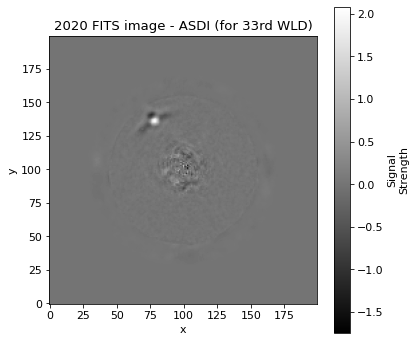

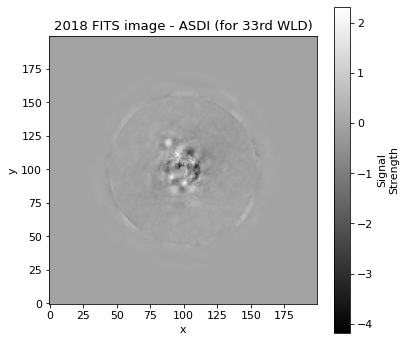

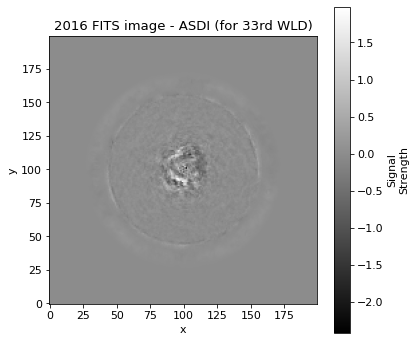

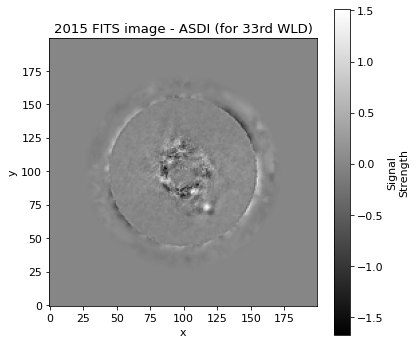

In [5]:
def plot_FITS_image(year, signalMatrix):
    plt.figure(figsize=(6,6)) #plt.imshow(image_data, cmap='gray') 
    plt.imshow(signalMatrix, cmap='gray', origin='lower') # 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic
    plt.xlabel('x'), plt.ylabel('y'), plt.title(str(year)+' FITS image - ASDI (for 33rd WLD)')
    cbar = plt.colorbar()
    cbar.set_label("Signal\nStrength")
    plt.show()
plot_FITS_image(2020, signalMatrix_2020)
plot_FITS_image(2018, signalMatrix_2018)
plot_FITS_image(2016, signalMatrix_2016)
plot_FITS_image(2015, signalMatrix_2015)

# Convert files/data-frames into (multidimensional) numpy arrays

In [6]:
#df2= pd.read_table(path+file2, header=None, delimiter=',') # delimiter={',', '(', ')'}
#pd.read_table(path+'ff_variable-table_properties_SADI_18_18.txt', header=None, delimiter=','))
df2 = pd.DataFrame([3, 3, 39, 200, 200]) # ASDI or SADI
df3 = pd.DataFrame([3, 3, 39, 200, 200]) # ASDI or SADI
df4 = pd.DataFrame([100, 39, 200, 200])  # CODI
df_table_ASDI_1_6 = pd.DataFrame([6, 6, 39, 200, 200])
df_table_SADI_1_6 = pd.DataFrame([6, 6, 39, 200, 200])
df_table_ASDI_1_8 = pd.DataFrame([8, 8, 39, 200, 200])
df_table_SADI_1_8 = pd.DataFrame([8, 8, 39, 200, 200]) # same as 2nd line in cell

'''PCAs1 = int(df2[0][0][1])
PCAs2 = int(df2[1][0])
wavelength_index = int(df2[2][0])'''

PCAs1 = df2[0][0]
PCAs2 = df2[0][1]
wavelength_index = df2[0][2]
PCAs1_b = df3[0][0]
PCAs2_b = df3[0][1]
wavelength_index_b = df3[0][2]
PCAs1_c = df4[0][0]
#PCAs2_c = df4[0][1]
wavelength_index_c = df4[0][1]

PCAs1_ASDI_1_6 = df_table_ASDI_1_6[0][0]
PCAs2_ASDI_1_6 = df_table_ASDI_1_6[0][1]
wavelength_index_ASDI_1_6 = df_table_ASDI_1_6[0][2]
PCAs1_SADI_1_6 = df_table_SADI_1_6[0][0]
PCAs2_SADI_1_6 = df_table_SADI_1_6[0][1]
wavelength_index_SADI_1_6 = df_table_SADI_1_6[0][2]

PCAs1_ASDI_1_8 = df_table_ASDI_1_8[0][0]
PCAs2_ASDI_1_8 = df_table_ASDI_1_8[0][1]
wavelength_index_ASDI_1_8 = df_table_ASDI_1_8[0][2]
PCAs1_SADI_1_8 = df_table_SADI_1_8[0][0]
PCAs2_SADI_1_8 = df_table_SADI_1_8[0][1]
wavelength_index_SADI_1_8 = df_table_SADI_1_8[0][2]

'''print('PCAs1_ASDI_1_6 is:', PCAs1_ASDI_1_6)
print('PCAs2_ASDI_1_6 is:', PCAs2_ASDI_1_6) 
print('wavelength_index_ASDI_1_6 is:', wavelength_index_ASDI_1_6) 
print('PCAs1_c is:',PCAs1_c)
print('wavelength_index_c is:',wavelength_index_c)
print(df_ASDI_1_6)'''

# A for loop to organize the data_frame into a plotable SNRatios

model_completeness = np.zeros( ( PCAs1, PCAs2, 2 ), dtype=float, order='C')
#print('the SN table is \n', SN_table)
bad_character = [ '[', ' ', ',', ']' ]
# (i+1)/(39-1) is for SDI
# (j+1)/(N_tot_lambda - 1) is for ADI

def set_SN_tables(df, pcas, WL_index):
    SN_table = np.zeros( ( pcas, pcas, WL_index ), dtype=float, order='C')
    for i in range(pcas):
        for j in range(pcas):
            for k in range(39):
                SN_table[i, j, k] = df[i][j][k]
    return(SN_table)
SN_table_ASDI_13 = set_SN_tables(df_ASDI_13_2020, 3, 39)
SN_table_SADI_13 = set_SN_tables(df_SADI_13_2020, 3, 39)
SN_table_ASDI_16 = set_SN_tables(df_ASDI_16_2020, 6, 39)
SN_table_SADI_16 = set_SN_tables(df_SADI_16_2020, 6, 39)
SN_table_ASDI_18 = set_SN_tables(df_ASDI_18_2020, 8, 39)
SN_table_SADI_18 = set_SN_tables(df_SADI_18_2020, 8, 39)

for i in range(3): 
    for j in range(3):
        for k in range(39): # 39 rows in the file/data
            #SN_table_a[i, j, k] = df_SADI_13_2020[i][j][k]
            #SN_table_b[i, j, k] = df_ASDI_13_2020[i][j][k]
            #SN_table_ASDI_16[i, j, k] = df_ASDI_16_2020[i][j][k]
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for ASDI (or maybe SADI)
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for SADI (or maybe ASDI)
            model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)]

print('\n\n', model_completeness[1,1])
print('\n\n', model_completeness)
print('\n\n', SN_table_ASDI_18[0][0][0])
#print('\n\n', SN_table[0][0])
#print('\n\n', SN_table[0])
#print('\n\n', SN_table)

# For now, take the Max(SNR) for each PCA, use that. Later, use the whole function of SNRs
# Can then make heat maps: techniques vs. max(SNR)... x:adi y:sdi
# Use all of the 4 Beta Pic observations



 [0.06451613 0.05263158]


 [[[0.03225806 0.02631579]
  [0.03225806 0.05263158]
  [0.03225806 0.07894737]]

 [[0.06451613 0.02631579]
  [0.06451613 0.05263158]
  [0.06451613 0.07894737]]

 [[0.09677419 0.02631579]
  [0.09677419 0.05263158]
  [0.09677419 0.07894737]]]


 -5.0689278687370285


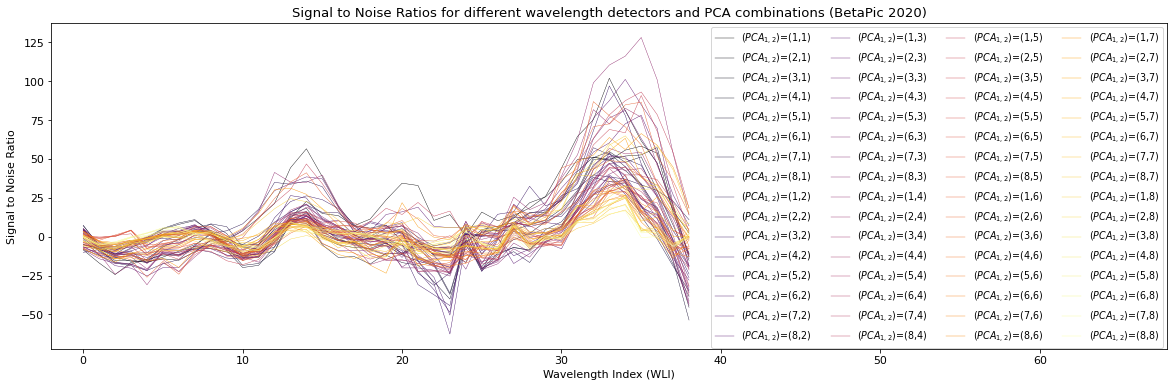

In [7]:
# Plot things #1: Signal to Noise ratio vs wavelength index, for various PCAs
p = plt.get_cmap('inferno') 
plt.figure(figsize = (20, 6))
wavelength_index = range(len(SN_table_ASDI_18[0][0]))
PCAs_here = 8
counter_color = 0
for j in range(PCAs_here):       # switch back to i then j! 
    for i in range(PCAs_here):
        plt.plot(wavelength_index, SN_table_ASDI_18[j][i], color=p(counter_color/((PCAs_here*PCAs_here)-1)), label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')', linewidth=0.4) ###
        #plt.plot(wavelength_index, SN_table[j][i], color=clrs[3*i+j], label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        #plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
        counter_color += 1
plt.title('Signal to Noise Ratios for different wavelength detectors and PCA combinations (BetaPic 2020)')
plt.xlabel('Wavelength Index (WLI)')
plt.ylabel('Signal to Noise Ratio')
plt.xlim(-2, 68)
plt.legend(ncol=4, loc=1, prop={'size': 9.5})

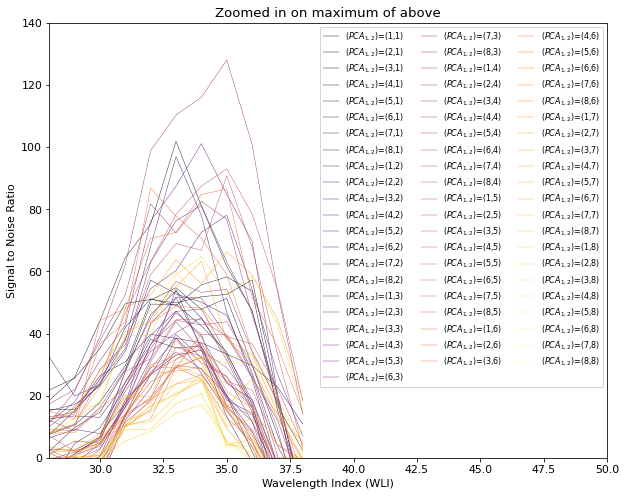

In [8]:
# Plot things #1: Signal to Noise ratio vs wavelength index, for various PCAs
p = plt.get_cmap('inferno') 
plt.figure(figsize = (10, 8))
wavelength_index = range(len(SN_table_ASDI_18[0][0]))
counter_color = 0
for j in range(PCAs_here):       # switch back to i then j! 
    for i in range(PCAs_here):
        plt.plot(wavelength_index, SN_table_ASDI_18[j][i], color=p(counter_color/((PCAs_here*PCAs_here)-1)), label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')', linewidth=0.4) ###
        counter_color += 1
plt.xlabel('Wavelength Index (WLI)')
plt.ylabel('Signal to Noise Ratio')
plt.title('Zoomed in on maximum of above')
plt.xlim(28,50)
plt.ylim(0,140)
plt.legend(ncol=3, loc= 1, prop={'size': 8})

In [9]:
# Plot things #2: Constant PCA1, plot PCA2 on varying wavelenths; constant PCA2, plot PCA1 on varying wavelenths
#        plt.plot(wavelength_index, PCA2, label='PCA_1=1')
#        plt.plot(wavelength_index, PCA1, label='PCA_2=1')

In [10]:
# This cell defines a function that takes in a SN_Table as input, determines, and outputs the maximum signal strength. It will be used several times in the next cell. Future investigations can expand from the simple maximum to some weighted average or weighted maximum range average. 
def find_maximum_signal(SN_table, PCAs1, PCAs2):
    wavelength_index = range(len(SN_table[0][0]))
    max_signal_strength = np.zeros( ( PCAs1, PCAs2 ), dtype=float, order='C') #might need to have pcas as inputs too
    counter = len(SN_table)
    #print('the counter is', counter)
    for i in range(counter):
        for j in range(counter):
            #print('i is now', i)
            #print('j is now', j)
            max_signal_strength[i,j] = (np.max(SN_table[j][i]))
            # wavelength_index, SN_table[j][i]
    #print(max_signal_strength) 
    return(max_signal_strength)

#find_maximum_signal(SN_table_ASDI_16, 6, 6)

#Prepare Heat Map Data Calculations

In [11]:
# Prepare heat map plots' data
def HeatMap_Data(SN_Table, pcas):
    max_sig_str = find_maximum_signal(SN_Table, pcas, pcas)
    data = pd.DataFrame(max_sig_str)
    return(data)

ASDI_13 = HeatMap_Data(SN_table_ASDI_13, 3)
SADI_13 = HeatMap_Data(SN_table_SADI_13, 3)
ASDI_16 = HeatMap_Data(SN_table_ASDI_16, 6)
SADI_16 = HeatMap_Data(SN_table_SADI_16, 6)
ASDI_18 = HeatMap_Data(SN_table_ASDI_18, 8)
SADI_18 = HeatMap_Data(SN_table_SADI_18, 8)

# Do I use different days/observations now to compare heat maps?

data = pd.DataFrame([[ASDI_18],[SADI_18],[ASDI_16],[SADI_16],[ASDI_13],[SADI_13]])

'''wavelength_index = range(len(SN_table[0][0]))
max_signal_strength = np.zeros( ( PCAs1, PCAs2 ), dtype=float, order='C')
for i in range(3):
    for j in range(3):
        max_signal_strength[i,j] = (max(SN_table[j][i]))
        # wavelength_index, SN_table[j][i]
print(max_signal_strength) 
'''

"wavelength_index = range(len(SN_table[0][0]))\nmax_signal_strength = np.zeros( ( PCAs1, PCAs2 ), dtype=float, order='C')\nfor i in range(3):\n    for j in range(3):\n        max_signal_strength[i,j] = (max(SN_table[j][i]))\n        # wavelength_index, SN_table[j][i]\nprint(max_signal_strength) \n"

#Plot the Heat Maps

the max colorbar should be ~190, and is: 195.82
the range(len(data)) is [0 1 2 3 4 5]
the len_PCAs is [8, 8, 6, 6, 3, 3]


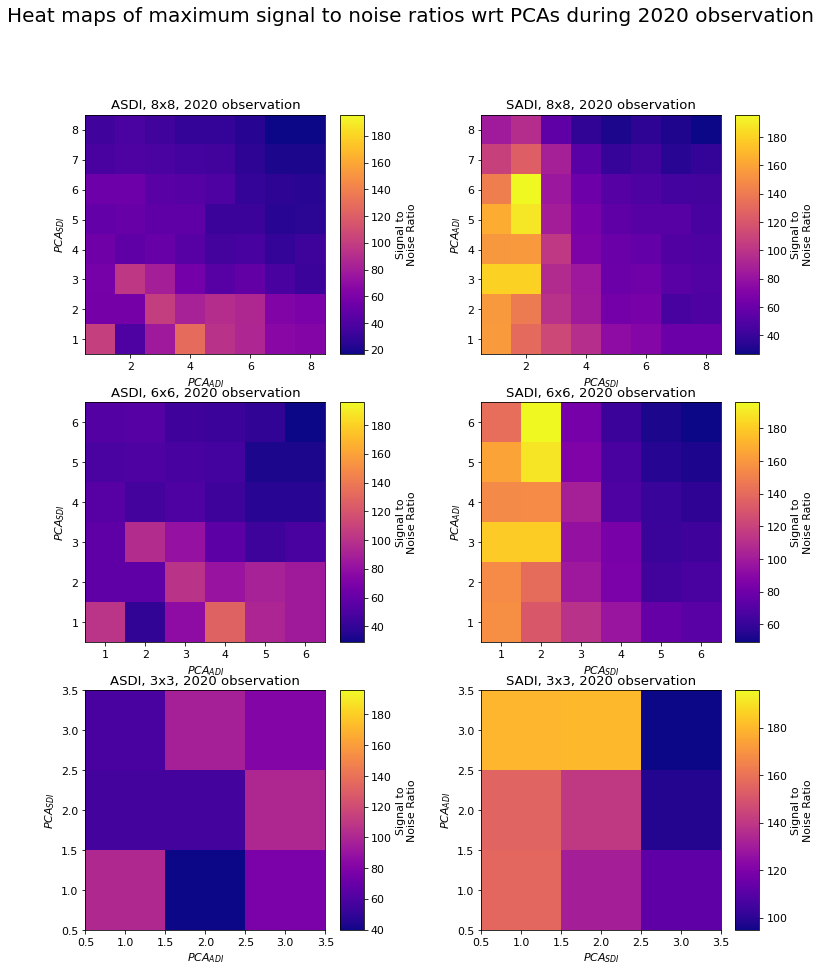

'\n# From stack overflow:\na = np.random.random((16, 16))\n#plt.imshow(a, cmap=\'hot\', interpolation=\'nearest\')\n#plt.show()\nfig = plt.figure()\ngrid = AxesGrid(fig, 111,\n                nrows_ncols=(2, 2),\n                axes_pad=0.05,\n                share_all=True,\n                label_mode="L",\n                cbar_location="right",\n                cbar_mode="single",\n                )\nfor val, ax in zip(a,grid):\n    #im = ax.imshow(val, vmin=0, vmax=1)\n    im = ax.imshow(a, cmap=\'hot\', interpolation=\'nearest\')\ngrid.cbar_axes[0].colorbar(im)\nfor cax in grid.cbar_axes:\n    cax.toggle_label(False)\n'

In [12]:
# plot HEAT MAPS of average Signal-to-Noise Ratios for the varied PCAs
from mpl_toolkits.axes_grid1 import AxesGrid
plt.rcParams["axes.grid"] = False #removes white line-grid 
import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable

# if feasible, use a command in imshow to flip the axis so origin is in bottom left

#fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, figsize = (14,12) ) 
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(nrows=3, ncols=2, figsize = (13,15) ) 
#ax = [ax1, ax2, ax3, ax4] # for i in range(4): ax[i]?
ax = [ax1, ax2, ax3, ax4, ax5, ax6]
fig.suptitle('Heat maps of maximum signal to noise ratios wrt PCAs during 2020 observation', fontsize=20)
len_PCAs = [len(ASDI_18), len(SADI_18), len(ASDI_16), len(SADI_16), len(ASDI_13), len(SADI_13)]

# Determine maximum S/R (to use for all Colorbar maxima)
Colorbar_Maximum = 0
for i in range(len(data)):
    for j in range(len(data[0][i])):
        for k in range(len(data[0][i][j])):
            #print(data[0][i][j][k])
            if data[0][i][j][k] > Colorbar_Maximum:
                #print('in if statement')
                Colorbar_Maximum = round(data[0][i][j][k], 2)
print('the max colorbar should be ~190, and is:', Colorbar_Maximum)
print('the range(len(data)) is', np.array(range(len(data))))
print('the len_PCAs is', len_PCAs)
for i in range(len(data)):
    image = ax[i].imshow(data[0][i], cmap='plasma', origin='lower', extent=[0.5, 0.5+int(len_PCAs[i]), 0.5, int(len_PCAs[i])+0.5], rasterized=True)
    divider=make_axes_locatable(ax[i])
    cax = divider.append_axes('right', size='10%', pad=0.2) # size is color-bar (CB) thickness, while pad is CB-HM separation
    image.set_clim(vmax=Colorbar_Maximum) # vmin=0, 
    cbar= fig.colorbar(image, cax=cax)
    cbar.set_label("Signal to\nNoise Ratio")
#ticks = ['1','2','3']
#ax1.set_xticks([0,1,2])
ax1.set_xlabel('$PCA_{ADI}$')
ax1.set_ylabel('$PCA_{SDI}$')
ax1.set_title('ASDI, 8x8, 2020 observation')
#ax2.set_xticks([1,2,3])
ax2.set_xlabel('$PCA_{SDI}$')
ax2.set_ylabel('$PCA_{ADI}$')
ax2.set_title('SADI, 8x8, 2020 observation')
#ax3.set_xticks([1,2,3])
ax3.set_xlabel('$PCA_{ADI}$')   # ('$PCAs_{CODI}$')
ax3.set_ylabel('$PCA_{SDI}$')
ax3.set_title('ASDI, 6x6, 2020 observation')
#ax4.set_xticks([1,2,3])
ax4.set_xlabel('$PCA_{SDI}$')
ax4.set_ylabel('$PCA_{ADI}$')
ax4.set_title('SADI, 6x6, 2020 observation')
#ax5.set_xticks([1,2,3])
ax5.set_xlabel('$PCA_{ADI}$')
ax5.set_ylabel('$PCA_{SDI}$')
ax5.set_title('ASDI, 3x3, 2020 observation')
#ax6.set_xticks([1,2,3])
ax6.set_xlabel('$PCA_{SDI}$')
ax6.set_ylabel('$PCA_{ADI}$')
ax6.set_title('SADI, 3x3, 2020 observation')
plt.show()

'''
im1 = ax1.imshow(data[0][0], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider1 = make_axes_locatable(ax1) 
cax1 = divider1.append_axes("right", size="10%", pad=0.4)
cbar1 = fig.colorbar(im1, cax=cax1)
im2 = ax2.imshow(data[0][1], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider2 = make_axes_locatable(ax2) 
cax2 = divider2.append_axes("right", size="10%", pad=0.4)
cbar2 = fig.colorbar(im2, cax=cax2)
im3 = ax3.imshow(data[0][2], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider3 = make_axes_locatable(ax3) 
cax3 = divider3.append_axes("right", size="10%", pad=0.4)
cbar3 = fig.colorbar(im3, cax=cax3)
im4 = ax4.imshow(data[0][3], cmap='plasma', origin='lower', interpolation='nearest', rasterized=True)
divider4 = make_axes_locatable(ax4) 
cax4 = divider4.append_axes("right", size="10%", pad=0.4)
cbar4 = fig.colorbar(im4, cax=cax4)
'''
'''
# From stack overflow:
a = np.random.random((16, 16))
#plt.imshow(a, cmap='hot', interpolation='nearest')
#plt.show()
fig = plt.figure()
grid = AxesGrid(fig, 111,
                nrows_ncols=(2, 2),
                axes_pad=0.05,
                share_all=True,
                label_mode="L",
                cbar_location="right",
                cbar_mode="single",
                )
for val, ax in zip(a,grid):
    #im = ax.imshow(val, vmin=0, vmax=1)
    im = ax.imshow(a, cmap='hot', interpolation='nearest')
grid.cbar_axes[0].colorbar(im)
for cax in grid.cbar_axes:
    cax.toggle_label(False)
'''

In [13]:
'''
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8))
fig.suptitle('Signal to Noise Ratios on Waveindex Number for 3 Observations')
for i in range(3):
    for j in range(3):
        ax1.plot(range(len(SN_table_2018[0][0])), SN_table_2018[j][i], color=clrs[3*i+j], label='($PCA_{2018: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax2.plot(range(len(SN_table_2016[0][0])), SN_table_2016[j][i], color=clrs[3*i+j], label='($PCA_{2016: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###
        ax3.plot(range(len(SN_table_2015[0][0])), SN_table_2015[j][i], color=clrs[3*i+j], label='($PCA_{2015: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###        
        # a = np.empty(9)
        # a[j] = i
        # ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')
        
ax1.set_ylim([-4, 5.2])
ax2.set_ylim([-4, 5.2])
ax3.set_ylim([-4, 5.2])
ax2.set_ylabel('Signal to Noise Ratio') #ax1.set_ylabel('Signal to Noise Ratio')
ax3.set_xlabel('Wavelength Index Number (WLI)')
ax1.set_title('2018', fontsize=10)
ax2.set_title('2016', fontsize=10)
ax3.set_title('2015', fontsize=10)
ax1.legend()
ax2.legend()
ax3.legend()
'''

"\nfig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14,8))\nfig.suptitle('Signal to Noise Ratios on Waveindex Number for 3 Observations')\nfor i in range(3):\n    for j in range(3):\n        ax1.plot(range(len(SN_table_2018[0][0])), SN_table_2018[j][i], color=clrs[3*i+j], label='($PCA_{2018: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###\n        ax2.plot(range(len(SN_table_2016[0][0])), SN_table_2016[j][i], color=clrs[3*i+j], label='($PCA_{2016: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###\n        ax3.plot(range(len(SN_table_2015[0][0])), SN_table_2015[j][i], color=clrs[3*i+j], label='($PCA_{2015: 1,2}$)=('+str(i+1)+','+str(j+1)+')') ###        \n        # a = np.empty(9)\n        # a[j] = i\n        # ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')\n        \nax1.set_ylim([-4, 5.2])\nax2.set_ylim([-4, 5.2])\nax3.set_ylim([-4, 5.2])\nax2.set_ylabel('Signal to Noise Ratio') #ax1.set_ylabel('Signal to Noise Ratio')\nax3.set_xlabel('Wavelength Index Number (WLI)')\nax1.set_t

# Mathematics of profile cut plots

X_profile_min:  0
X_profile_max:  200


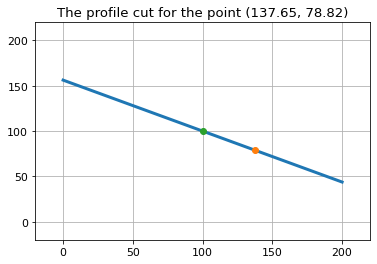

X_profile_min:  0
X_profile_max:  200


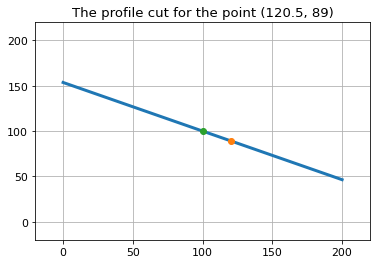

X_profile_min:  0
X_profile_max:  200


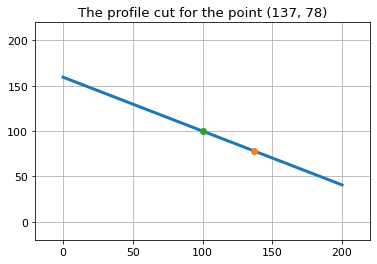

X_profile_min:  33.333333333333336
X_profile_max:  166.66666666666666


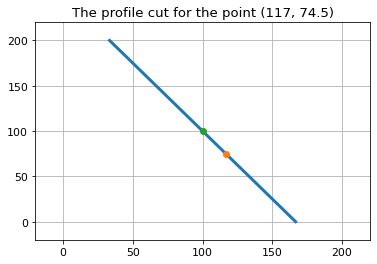

X_profile_min:  73.11827956989248
X_profile_max:  126.88172043010752


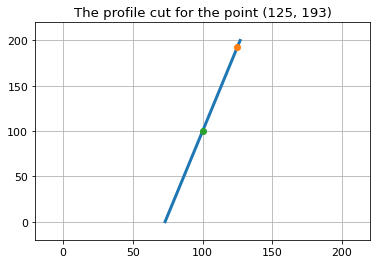

len of boxes is: 		 1000
len of numpy unique boxes is: 		 293
len of boxes is: 		 1000
len of numpy unique boxes is: 		 285
len of boxes is: 		 1000
len of numpy unique boxes is: 		 295
len of boxes is: 		 1000
len of numpy unique boxes is: 		 267
len of boxes is: 		 1000
len of numpy unique boxes is: 		 244
length of input: 293
CrossSSig Max is: 	 2.0137123406284063
CrossSSig Max's location is: 	 199
length of input: 285
CrossSSig Max is: 	 1.4704491078524982
CrossSSig Max's location is: 	 171
length of input: 295
CrossSSig Max is: 	 1.0032741837192611
CrossSSig Max's location is: 	 161
length of input: 267
CrossSSig Max is: 	 0.8818118949103718
CrossSSig Max's location is: 	 147
length of input: 244
CrossSSig Max is: 	 0.8600422433043757
CrossSSig Max's location is: 	 118


In [14]:
# Determine which pixels are along the line between the star and the planet.
# An ADI image in ds9 suggests: bottom left is origin (0,0), and the top right is (200,200)

#signalMatrix =  # the large matrix of signal strength from the data reduction (image in numbers)
FieldOfView_X = 200 # from the image outputs or from Sven
FieldOfView_Y = 200 # from the image outputs or from Sven
Xcen_2020, Ycen_2020 = 137.65, 78.82 #actually Xcen=78.82,Ycen=137.65... # the x & y coordinates are switched 
Xcen_2018, Ycen_2018 = 120.5, 89 # 90, 121 # best might be with 35th WLD and with PCAs=2,2
Xcen_2016, Ycen_2016 = 137, 78
Xcen_2015, Ycen_2015 = 117, 74.5 # best might be with 34th WLD and with PCAs=2,1
test_Xcen, test_Ycen = 125, 193 # 25, 40

def inputCenter_outputPlot(XCen, YCen):
    pixelSize = 1 # from the image outputs or from Sven
    signalCenter = [XCen, YCen] # from the data reduction's code, or from visual inspection
    m = ((YCen-100)/(XCen-100))
    X_profile_max = (XCen/YCen)*FieldOfView_Y # calculated while assuming the star was at the origin. Otherwise use = ((Xcen-Xstar)/(Ycen-Ystar))*FieldOfView_Y
    if abs(m) > 1:
        X_prof_min_buffer = 100*(1 - (1/abs(m)))
        X_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        Y_prof_min_buffer = 0
        Y_prof_max_buffer = 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
    else:
        Y_prof_min_buffer = 100*(1 - (1/abs(m))) #abs(m)?
        Y_prof_max_buffer = 100*(1 + (1/abs(m))) #abs(m)?
        X_prof_min_buffer = 0
        X_prof_max_buffer = 0
        X_profile_min = 0 + X_prof_min_buffer #(Xcen/Ycen)*FieldOfView_Y
        X_profile_max = 200 - X_prof_max_buffer #(Xcen/Ycen)*FieldOfView_Y
    print('X_profile_min: ', X_profile_min)
    print('X_profile_max: ', X_profile_max)
    xComponent = np.linspace(X_profile_min, X_profile_max, 1000) #maybe more than 1000
    yComponent = YCen + m*(xComponent - XCen)
    #print('x is: '+str(xComponent)+'.\n\ny is: '+str(yComponent)) # Test: should be values that start and end between 0 and 200
    plt.plot(xComponent, yComponent, '-', linewidth=3)
    plt.plot(XCen, YCen, 'o')
    plt.plot(100, 100, 'o')
    plt.title('The profile cut for the point ('+str(XCen)+', '+str(YCen)+')')
    plt.xlim(-20,220)
    plt.ylim(-20,220)
    plt.grid()
    plt.show()
    return(xComponent, m)
xComponent_2020, m_2020 = inputCenter_outputPlot(Xcen_2020, Ycen_2020)                      #137.65, 78.82
radiusArray_2020 = [] # or rename this "pixelPath"
xComponent_2018, m_2018 = inputCenter_outputPlot(Xcen_2018, Ycen_2018)  #120.5, 89
radiusArray_2018 = []
xComponent_2016, m_2016 = inputCenter_outputPlot(Xcen_2016, Ycen_2016)
radiusArray_2016 = []
xComponent_2015, m_2015 = inputCenter_outputPlot(Xcen_2015, Ycen_2015)
radiusArray_2015 = []
testX, testm = inputCenter_outputPlot(test_Xcen, test_Ycen)


# This approach determines in which pixel each point on the line is in, and then removes the many redundant pixels
def pixels_under_the_star_planet_line(Xcen, Ycen, xComponent, m):
    boxes = []
    for i in xComponent:
        xCoord = i
        yCoord = Ycen + m*(i - Xcen) #slope of the line equation (Ycen + m*(i-Xcen))???
        boxes.append([int(xCoord), int(yCoord)])
        #print('all boxes are:\n', boxes)
    unique_boxes = []
    for i in boxes:
        if i not in unique_boxes:
            unique_boxes.append(i)
    UniqueBoxesNP = np.array(unique_boxes)
    #print('numpy unique boxes are:\n', UniqueBoxesNP)
    print('len of boxes is: \t\t', len(boxes)) # should be the number of points in the np.linspace command 
    print('len of numpy unique boxes is: \t\t', len(UniqueBoxesNP))
    return(UniqueBoxesNP)
UniqueBoxesNP_2020 = pixels_under_the_star_planet_line(Xcen_2020, Ycen_2020, xComponent_2020, m_2020)
UniqueBoxesNP_2018 = pixels_under_the_star_planet_line(Xcen_2018, Ycen_2018, xComponent_2018, m_2018)
UniqueBoxesNP_2016 = pixels_under_the_star_planet_line(Xcen_2016, Ycen_2016, xComponent_2016, m_2016)
UniqueBoxesNP_2015 = pixels_under_the_star_planet_line(Xcen_2015, Ycen_2015, xComponent_2015, m_2015)
test_UniBoxNP = pixels_under_the_star_planet_line(test_Xcen, test_Ycen, testX, testm)

'''
# This approach loops through all pixels and determines if any part of the line is within its boutnds
for i in range(FieldOfView_X):
    for j in range(FieldOfView_Y):
        #print('i is: '+str(i)+', and j is: '+str(j))
        if xComponent.any()>i*pixelSize and xComponent.any()<(i+1)*pixelSize and yComponent.any()>j*pixelSize and yComponent.any()<(j+1)*pixelSize: # Do I want to use a "here < x < there" or a "x in i&j" approach here?
#        if xComponent in i and yComponent in j: # Do I want to use a "here < x < there" or a "x in i&j" approach here?
            radiusArray.append([i,j])
print('radiusArray (unnecessary):\n', (radiusArray))
radiusArrayNP = np.array(radiusArray)
radiusArrayUnique = np.unique(radiusArrayNP)
print('radiusArrayUnique (unnecessary):\n', (radiusArrayUnique))
# Here flatten the array so there are no duplicate values
'''

def signal_of_selected_pixels(UniqueBoxesNP, signalMatrix):
    print('length of input:', len(UniqueBoxesNP))
    CrossSectionalSignal = []
    for i in UniqueBoxesNP:
        # print(i)
        if i[0] <= 199.1 and i[1] < 199.1:
            #print('i[0] and i[1]', i[0], i[1])
            #print(signalMatrix[i[0]][i[1]])
            CrossSectionalSignal.append(signalMatrix[i[0]][i[1]])
            #CrossSectionalSignal = signalMatrix[UniqueBoxesNP] # the signal values at coordinates radiusArray
    #print('CrossSSig is: ', CrossSectionalSignal)
    print('CrossSSig Max is: \t', max(CrossSectionalSignal))
    for i in range(len(CrossSectionalSignal)):
        if (CrossSectionalSignal[i] + 0.001) > max(CrossSectionalSignal):
            CSS_max_location = i
    print('CrossSSig Max\'s location is: \t', CSS_max_location)

    # convert Unique boxes into 'distance from star' array [-100, 100]
    # print(UniqueBoxesNP[:,0])
    DistanceFromStar = np.sqrt((UniqueBoxesNP[:,0] - 100)**2 + (UniqueBoxesNP[:,1] - 100)**2)
    for i in range(int(len(DistanceFromStar)/2)):
        DistanceFromStar[i] = (-1)*DistanceFromStar[i]
    if len(DistanceFromStar) != len(CrossSectionalSignal):
        DistanceFromStarTruncate = np.delete(DistanceFromStar,-1)
    else:
        DistanceFromStarTruncate = DistanceFromStar
    return(CrossSectionalSignal, DistanceFromStarTruncate)
CrossSectionalSignal_2020, DistanceFromStarTruncate_2020 = signal_of_selected_pixels(UniqueBoxesNP_2020, signalMatrix_2020) ###
CrossSectionalSignal_2018, DistanceFromStarTruncate_2018 = signal_of_selected_pixels(UniqueBoxesNP_2018, signalMatrix_2018)
CrossSectionalSignal_2016, DistanceFromStarTruncate_2016 = signal_of_selected_pixels(UniqueBoxesNP_2016, signalMatrix_2016)
CrossSectionalSignal_2015, DistanceFromStarTruncate_2015 = signal_of_selected_pixels(UniqueBoxesNP_2015, signalMatrix_2015) 
#print(test_UniBoxNP)
testCSS, testDFST = signal_of_selected_pixels(test_UniBoxNP, signalMatrix_2020)
 

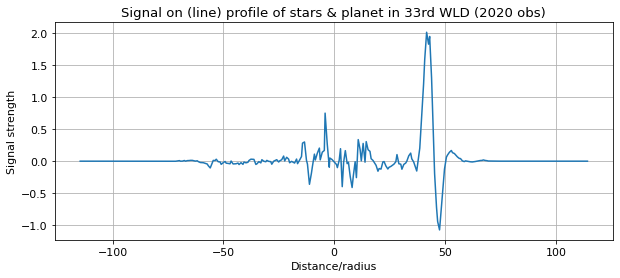

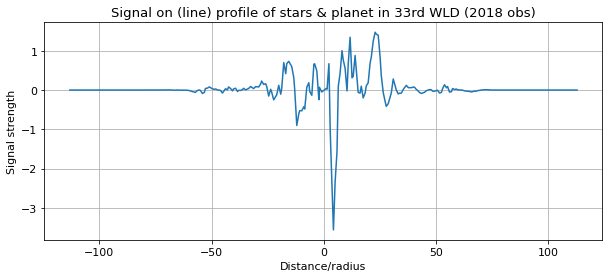

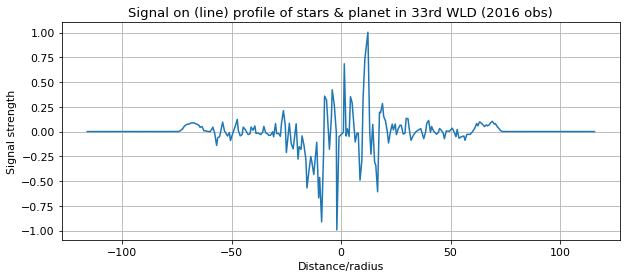

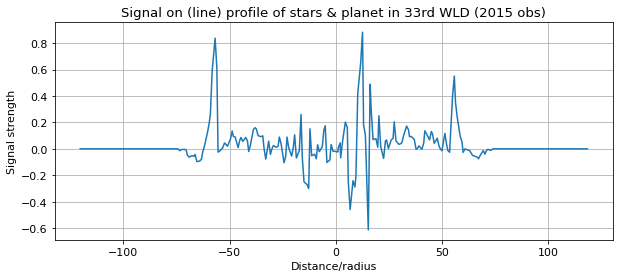

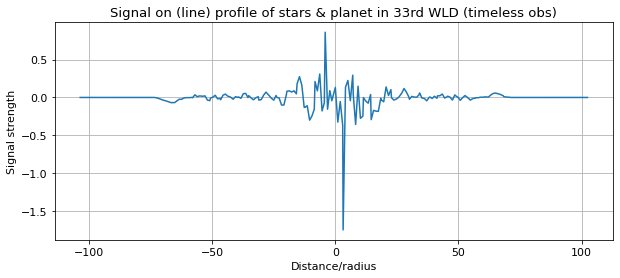

()

In [15]:
# Plot the signal strength  along the line from the center thorugh the brightest/central planet pixel/signal. Find a way to characterize the darkness/dips before and after the peak signal (the artifact) ##

def plot_one_singal_on_separation(rad, sig, year):
    plt.figure(figsize=(10,4))
    plt.plot(rad, sig)
    plt.title('Signal on (line) profile of stars & planet in 33rd WLD ('+str(year)+' obs)')
    plt.xlabel('Distance/radius')
    plt.ylabel('Signal strength')
    #plt.ylim(-5,8)
    plt.grid()
    plt.show()
    return()
plot_one_singal_on_separation(DistanceFromStarTruncate_2020, CrossSectionalSignal_2020, 2020)
plot_one_singal_on_separation(DistanceFromStarTruncate_2018, CrossSectionalSignal_2018, 2018)
plot_one_singal_on_separation(DistanceFromStarTruncate_2016, CrossSectionalSignal_2016, 2016)
plot_one_singal_on_separation(DistanceFromStarTruncate_2015, CrossSectionalSignal_2015, 2015)
plot_one_singal_on_separation(testDFST, testCSS, 'timeless')

# After getting this first plot, do it again 39 times for each wavelength_index...

X_profile_min:  43.74501992031872
X_profile_max:  156.25498007968127


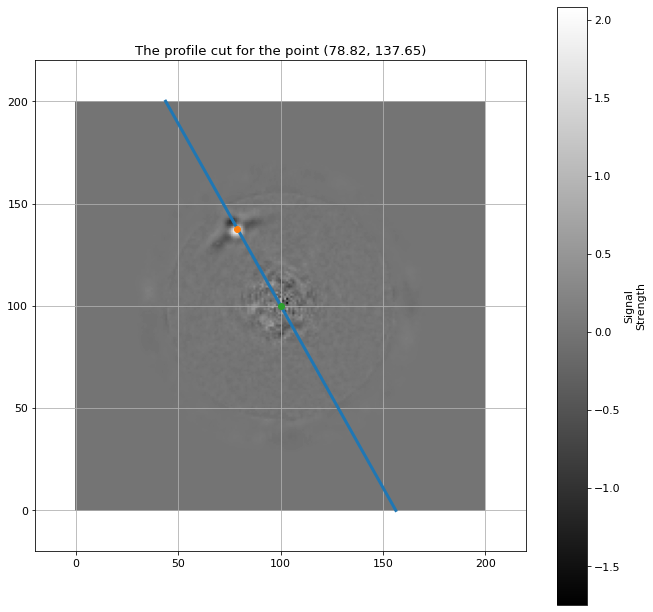

In [16]:
# plot the imshow & plt together 
plt.figure(figsize=(11,11)) 
plt.title('SPHERE image with planet-star cut superimposed (2020 obs)')
plt.imshow(signalMatrix_2020, cmap='gray', origin='lower') # 'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic
cbar = plt.colorbar()
cbar.set_label("Signal\nStrength")
xComponent_2020, m_2020 = inputCenter_outputPlot(Ycen_2020, Xcen_2020) # USE THESE REVERSED INPUTS!
plt.show()

In [17]:
# this cell turns the (messy) plotting above code into a clean function 
def plot_signal_profile(wavelength_index, UniqBox, img_data_yr):
    '''
    if real_test_planet == 'real':
        UniqueBoxes = UniqueBoxesNP
    elif real_test_planet == 'test':
        UniqueBoxes = test_UniBoxNP
    else:
        print('error in plot signal profile function')
    '''

    DistanceFromStar = np.sqrt((UniqBox[:,0] - 100)**2 + (UniqBox[:,1] - 100)**2)
    # print(DistanceFromStar)
    for i in range(int(len(DistanceFromStar)/2)): #make half the line in a negative direction 
        DistanceFromStar[i] = (-1)*DistanceFromStar[i] 
    radius = np.delete(DistanceFromStar,-1)

    #print(img_data_yr.shape)
    
    signalMatrix = signalMatrix_2020 = np.zeros(200*200).reshape(200,200) 
    for i in range(200):
        for j in range(200):
            if len(img_data_yr.shape) == 4: # or shape == 4
                signalMatrix[i][j] = img_data_yr[0][wavelength_index][i][j]
            elif len(img_data_yr.shape) == 5: # or shape == 5
                signalMatrix[i][j] = img_data_yr[0][0][wavelength_index][i][j]
            else:
                print('Your input matrix does not have appropriate dimensions... is it ASDI vs. ADI?')

    signal = []
    for i in UniqBox: # might need to define this 
        if i[0] <= 199.1 and i[1] < 199.1:
            signal.append(signalMatrix[i[0]][i[1]])
    return(radius, signal)

#r, s = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020)

# Plot the 39 detectors 

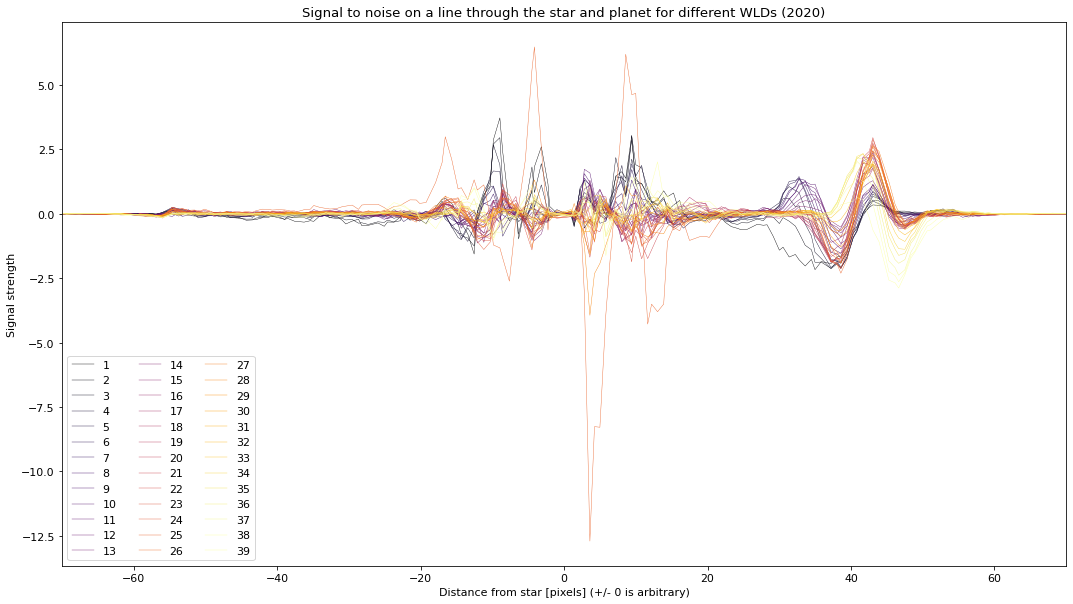

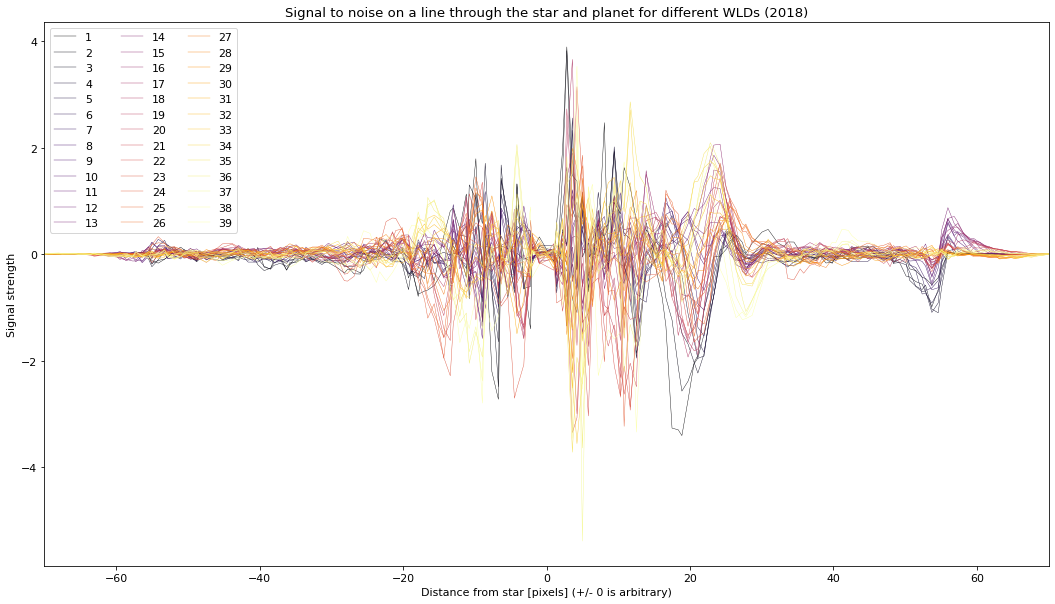

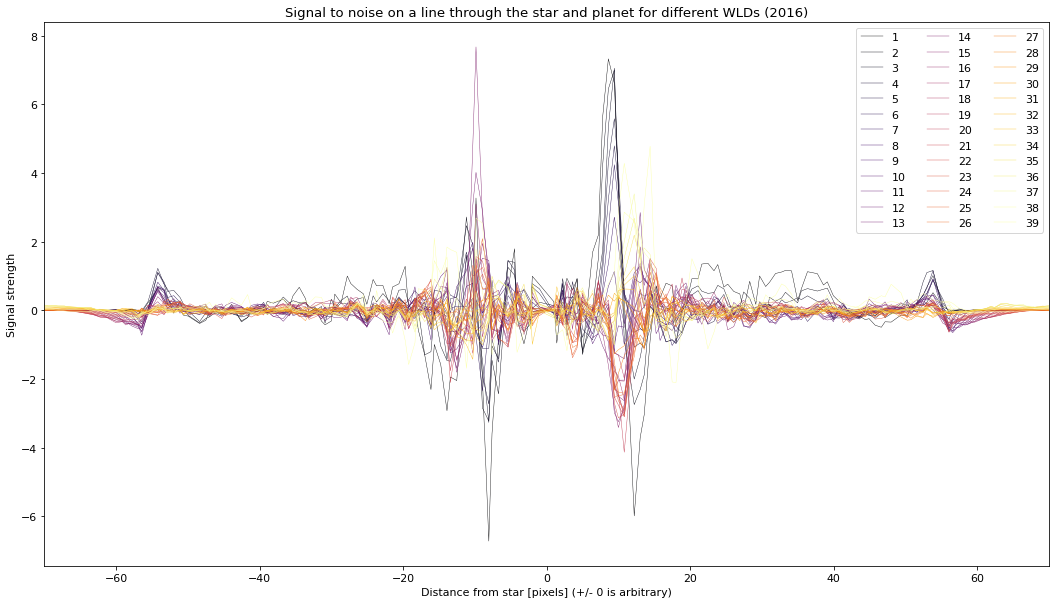

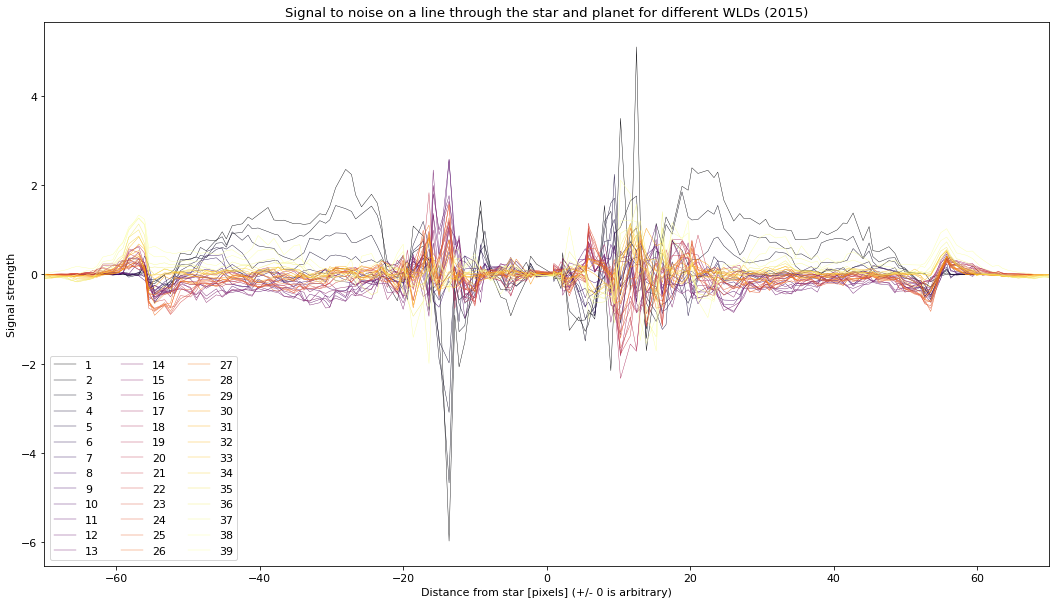

()

In [18]:
# this cell makes the above plot for all 39 wavelengths
wavelength_index = range(39)
n = max(wavelength_index)

def plot_signal_profile_cuts(boxPixels, imageData, year):
    plt.figure(figsize=(18,10))
    for i in wavelength_index:
        rad, sig = plot_signal_profile(i, boxPixels, imageData)
        plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    plt.title('Signal to noise on a line through the star and planet for different WLDs ('+str(year)+')')
    plt.xlim(-70, 70)
    plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
    plt.ylabel('Signal strength')
    plt.legend(ncol=3)
    plt.show()
    return()

plot_signal_profile_cuts(UniqueBoxesNP_2020, image_data_2020, 2020)
plot_signal_profile_cuts(UniqueBoxesNP_2018, image_data_2018, 2018)
plot_signal_profile_cuts(UniqueBoxesNP_2016, image_data_2016, 2016)
plot_signal_profile_cuts(UniqueBoxesNP_2015, image_data_2015, 2015)



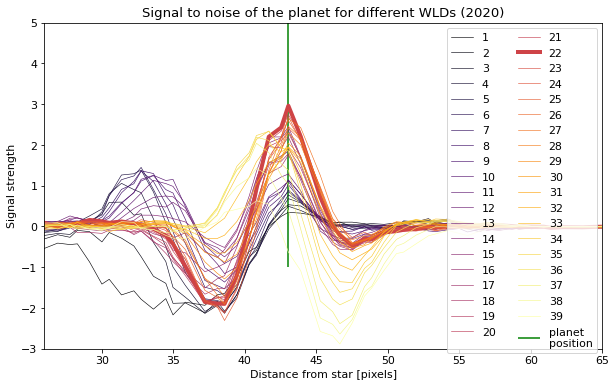

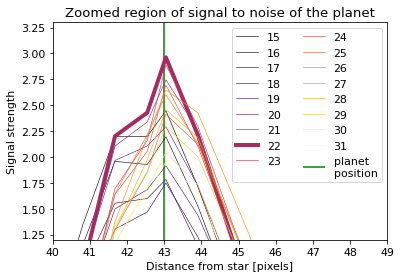

In [19]:
# Zoom in on the planet signal (hill) around 40 [pixels]

def zoom_in_on_plot(boxPixels, imageData, WLI_of_interest, WLmin, WLmax, xfig, yfig, xmin, xmax, ymin, ymax, year, txt):
    data_name = str(imageData)
    WLI_of_interest = WLI_of_interest - 1
    PlanetPosition = 43
    wl_selection = wavelength_index[WLmin:WLmax]
    plt.figure(figsize=(xfig,yfig))
    for i in wl_selection:
        rad, sig = plot_signal_profile(i, boxPixels, imageData);
        if i != WLI_of_interest:
            plt.plot(rad, sig, linewidth=0.6, color=p((i-WLmin)/((WLmax-WLmin)-1)), label=str(i+1))
        else:
            plt.plot(rad, sig, linewidth=4, color=p((i-WLmin)/((WLmax-WLmin)-1)), label=str(i+1))
    # plt.axvline(x = PlanetPosition, color = 'b', label = 'planet\nposition')
    plt.vlines(x = PlanetPosition, ymin = -1, ymax = ymax, colors = 'green', label = 'planet\nposition')
    if txt == 1:
        plt.title('Zoomed region of signal to noise of the planet') # of '+data_name)
    else:
        plt.title('Signal to noise of the planet for different WLDs ('+str(year)+')')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.xlabel('Distance from star [pixels]')
    plt.ylabel('Signal strength')
    plt.legend(ncol=2, loc=1)
    plt.show()
    return(rad, sig);

# the rad, sig 's are unsued
rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)
rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 14, 31, xfig=6, yfig=4, xmin=40, xmax=49, ymin=1.2, ymax=3.3, year=2020, txt=1) # Zoom in on the peak, use only highest colors, rescale them



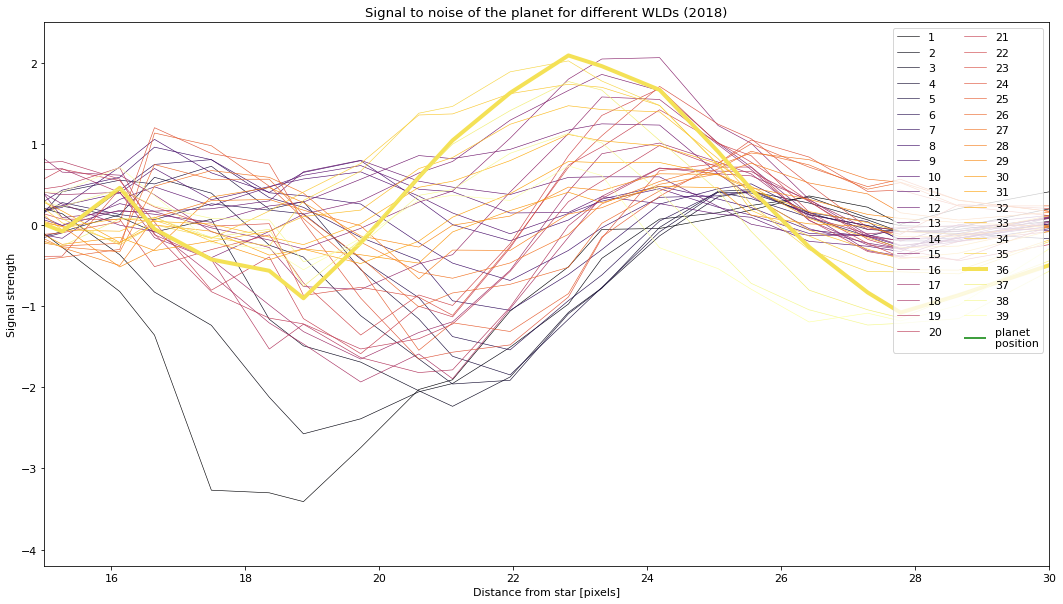

In [20]:
# Zoom in on 2018 plot

rad,sig = zoom_in_on_plot(UniqueBoxesNP_2018, image_data_2018, 36, 0, 39, xfig=18, yfig=10, xmin=15, xmax=30, ymin=-4.2, ymax=2.5, year=2018, txt=0)


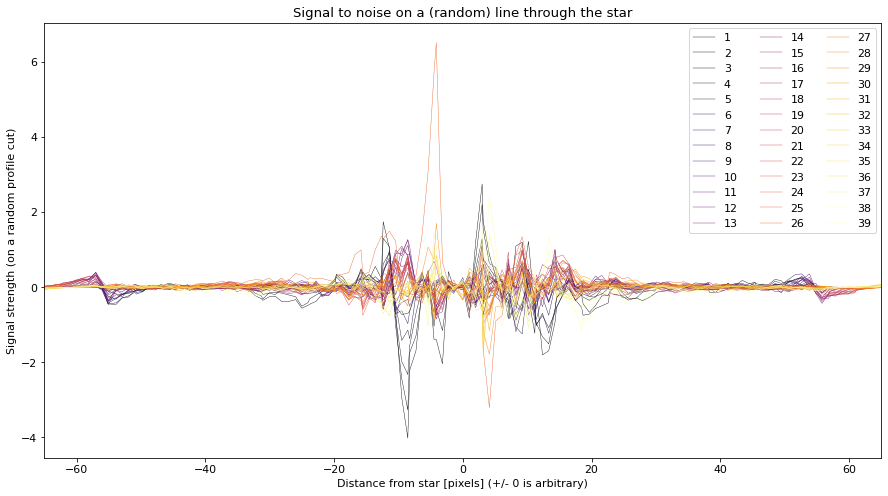

In [21]:
# plot the s/r through a random cut profile (with no planet) 

plt.figure(figsize=(15,8))
for i in wavelength_index:
    rad, sig = plot_signal_profile(i, test_UniBoxNP, image_data_2020)
    if len(sig) == len(rad)+1:
        sig = np.delete(sig,-1)
    plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    # plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=i)
plt.title('Signal to noise on a (random) line through the star')
plt.xlim(-65, 65)
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
plt.ylabel('Signal strength (on a random profile cut)')
plt.legend(ncol=3)
plt.show()

In [22]:
def plot_signals_on_radii(rad, sig):
    for i in wavelength_index:
        plt.plot(rad, sig, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    plt.title('Signal to noise on radii for different WLDs')    # a line through the star and planet ('+str(year)+')')
    plt.xlim(-26, 65)
    plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)') 
    plt.ylabel('Signal strength')
    #plt.legend(ncol=3)
    #plt.show()                                                  # plt.figure(figsize=(18,10))
    return()


In [23]:
def get_radius_signal_NoPlots(boxPixels, imageData, WLI_of_interest, WLmin, WLmax, xfig, yfig, xmin, xmax, ymin, ymax, year, txt):
    #data_name = str(imageData) #WLI_of_interest = WLI_of_interest - 1
    wl_selection = wavelength_index[WLmin:WLmax] #plt.figure(figsize=(xfig,yfig))
    for i in wl_selection:
        rad, sig = plot_signal_profile(i, boxPixels, imageData)
    return(rad, sig)

# Make new plots that supress the signal reduction of the artifact (around a planet)

points_in_range_counter is: 25
range(len(signal_2020_modified[0])) is range(0, 292)
signal_2020_modified is: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


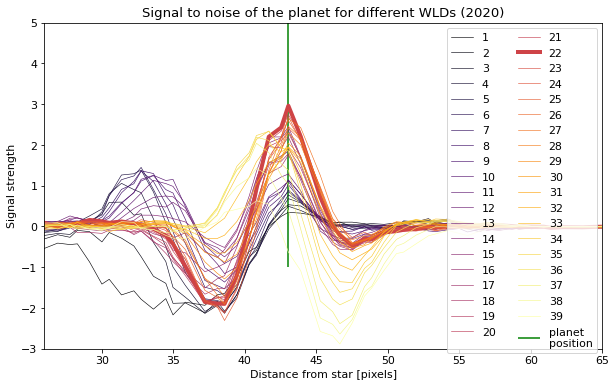

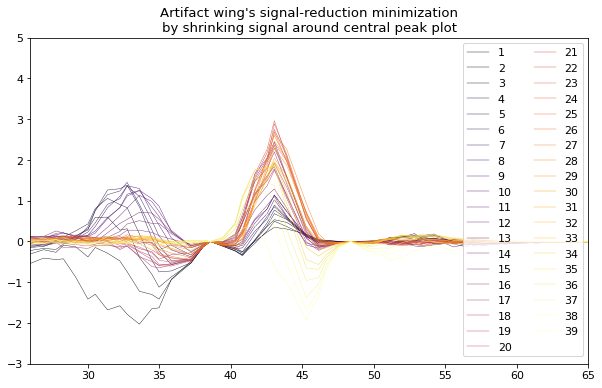

In [24]:
#from astropy.utils.misc import signal
# Define some artificial parameters that subtract out the dips in the artifact around the signal peak

signal_2020_modified = []
for i in wavelength_index:
    radius, signal = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020) #, i, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)
    signal_2020_modified.append(signal)
signal_2020_modified = np.array(signal_2020_modified)

#print('radius.shape is', np.array(radius).shape)
#print('signal_2020_modified.shape is', np.array(signal_2020_modified).shape)
#print('range(len(signal_2020_modified[22])) is', range(len(signal_2020_modified[22]))) #should be (0,1...292)

points_in_range_counter, starting_point_counter = 0, 0
peak_center, peak_wings = 43, 10
r_min = peak_center - peak_wings
r_max = peak_center + peak_wings
for i in range(len(signal_2020_modified[22])):
    if radius[i] > r_min and radius[i] < r_max:
        points_in_range_counter = points_in_range_counter + 1 # loop thru signal array, find how first and many points near peak
        if starting_point_counter == 0:
            starting_point_counter = i
duration = 1                                                                # Make this the period around the peak
theta = np.linspace(0, 4*np.pi, points_in_range_counter)                    # Make this the phase of the period (twice)
print('points_in_range_counter is:', points_in_range_counter)
print('range(len(signal_2020_modified[0])) is', range(len(signal_2020_modified[0])))
#print('theta is:', theta)
### Calculate the modified signal in each WLD range(/maximum)
for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > r_min and radius[j] < r_max:
            #print('i is', i)
            #print('j is', j)
            #print('signal_2020_modified[i,j]', signal_2020_modified[i,j])
            #print('((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)) is', ((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)))
            signal_2020_modified[i, j] = signal_2020_modified[i, j]*((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)) # loop thru signals, if in peak, multiply
print('signal_2020_modified is:', signal_2020_modified)

rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)

#print('radius', radius)
plt.figure(figsize=(10,6))
for i in wavelength_index:
    plt.plot(radius, signal_2020_modified[i], linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Artifact wing\'s signal-reduction minimization\nby shrinking signal around central peak plot')
plt.xlim([26, 65])
plt.ylim([-3, 5])
plt.legend(ncol=2, loc=1)
plt.show()


signal_2020_modified is: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


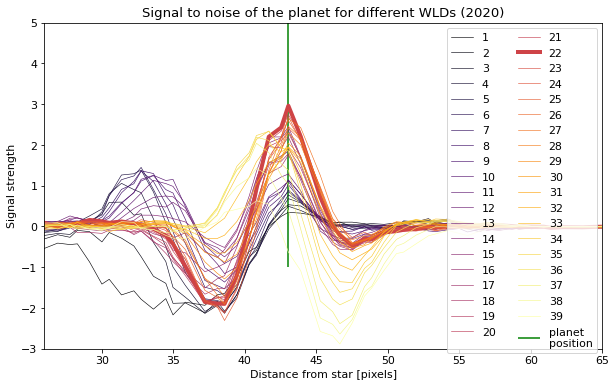

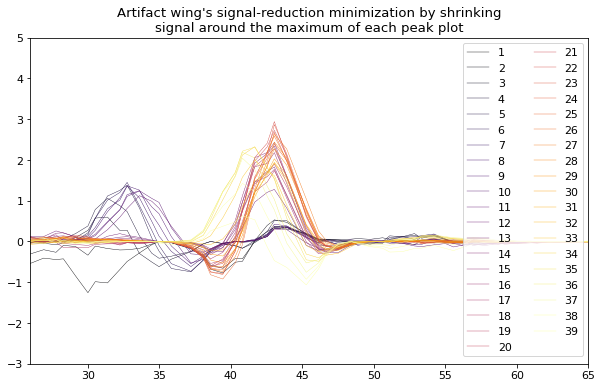

In [25]:
# Define some artificial parameters that subtract out the dips in the artifact around the every WLDs' maximum peaks

radius, signal = plot_signal_profile(22, UniqueBoxesNP_2020, image_data_2020)
signal_2020_modified = np.zeros((len(wavelength_index), len(signal)))
for i in wavelength_index:
    radius, signal = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020) #, i, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)
    signal_2020_modified[i,:] = signal
#signal_2020_modified = np.array(signal_2020_modified)

points_in_range_counter, starting_point_counter = 0, [0]
### Define 1 range to search for maximum (in all WLD)
range_center, range_wings = [43], [15]
r_min = range_center[0] - range_wings[0]
r_max = range_center[0] + range_wings[0]
### Find maximum of each WLD (in the 1 range)
maximums = np.zeros(len(wavelength_index))
max_location = np.zeros(len(wavelength_index))
ranges = np.zeros((len(maximums), 2))
for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > r_min and radius[j] < r_max:
            if maximums[i] < signal_2020_modified[i,j]:
                maximums[i] = signal_2020_modified[i,j]
                i_max, j_max = i, j
    max_location_index = j_max
    max_location[i] = radius[j_max] # in pixels #print('max_location', max_location)

### Assign a calculation range, in pixel units, around each WLD's maximum
starting_counter = np.zeros(len(wavelength_index))
counter = np.zeros(len(wavelength_index))
for i in range(len(max_location)):
    ranges[i,0] = max_location[i] - range_wings[0]
    ranges[i,1] = max_location[i] + range_wings[0]
for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:
            counter[i] = counter[i] + 1
            if starting_counter[i] == 0:
                starting_counter[i] = int(j)            # print('counter', counter)     print('starting_counter', starting_counter) #print('ranges', ranges)    print('3\'s min', ranges[3,0])  print('3\'s max', ranges[3,1])

### Calculate the modified signal in each WLD's signal's range(/maximum)
for i in wavelength_index:
    theta = np.linspace(0, 4*np.pi, int(counter[i]))
    #print('theta', theta)
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:             #print('inside if statement, j is:', j)             #print('starting_counter[i] is:', starting_counter[i])             #print('j - start is:', j-starting_point_counter)
            signal_2020_modified[i,j] = signal_2020_modified[i,j]*( (1/2)*(np.cos(theta[j-int(starting_counter[i])]) + 1) )
print('signal_2020_modified is:', signal_2020_modified)

rad, sig = zoom_in_on_plot(UniqueBoxesNP_2020, image_data_2020, 22, 0, 39, xfig=10, yfig=6, xmin=26, xmax=65, ymin=-3, ymax=5, year=2020, txt=0)

plt.figure(figsize=(10,6))
for i in wavelength_index:
    plt.plot(radius, signal_2020_modified[i], linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Artifact wing\'s signal-reduction minimization by shrinking\nsignal around the maximum of each peak plot')
plt.xlim([26, 65])
plt.ylim([-3, 5])
plt.legend(ncol=2, loc=1)
plt.show()

# Find angular and radial profile cuts on a single WLD
## This is useful for the plots above, but doesn't show much of the data at this code's disposal

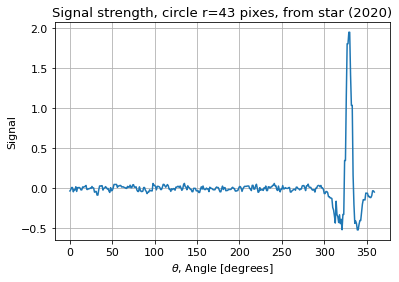

maximum occurs at: (array([329, 330]),)
which has 0-th 0-th component: 329
Lets just use: 329
1.9477994510662628is: 1.9477994510662628
the format is such that the planet position is: 136.85819393019082 77.85336277886765


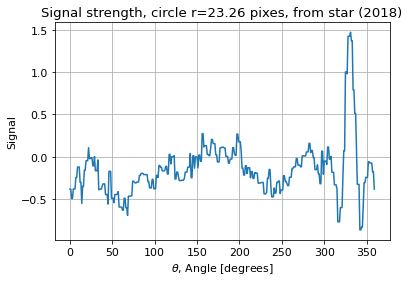

maximum occurs at: (array([331]),)
which has 0-th 0-th component: 331
Lets just use: 331
1.4704491078524982is: 1.4704491078524982
the format is such that the planet position is: 120.34365438806235 88.7233282330702


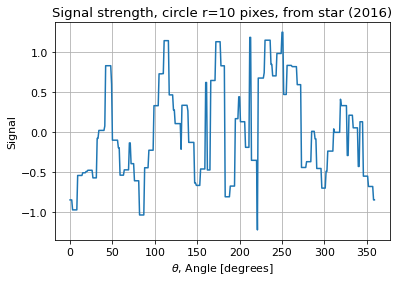

maximum occurs at: (array([250, 251]),)
which has 0-th 0-th component: 250
Lets just use: 250
1.2529107421634045is: 1.2529107421634045
the format is such that the planet position is: 96.57979856674332 90.60307379214092


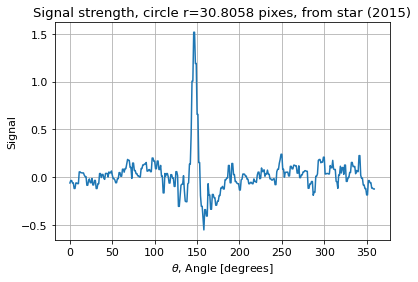

maximum occurs at: (array([146, 147]),)
which has 0-th 0-th component: 146
Lets just use: 146
1.5160219153393395is: 1.5160219153393395
the format is such that the planet position is: 74.4608343473839 117.22638474573914


In [26]:
# Use brute force to find the angle between the zero axis and the planet; the planet is about 43 pixels away from 100,100

def find_angle__star_planet(radius, signalMatrix, year):
    signal, x, y = [], [], []
    deg = range(360)
    rad = radius
    for i in deg:
        x.append(100 + rad*np.cos(np.deg2rad(i)))
        y.append(100 + rad*np.sin(np.deg2rad(i)))
        signal.append(signalMatrix[round(x[i]), round(y[i])]) ###
    # print(x), print(y)
    plt.plot(deg, signal)
    plt.title('Signal strength, circle r='+str(radius)+' pixes, from star ('+str(year)+')' )
    plt.xlabel('$\\theta$, Angle [degrees]')
    plt.ylabel('Signal')
    plt.grid()
    plt.show()
    # the planet is 329-330 degrees 
    sig_max_location = np.where(signal == np.amax(signal))
    print('maximum occurs at:', sig_max_location)
    print('which has 0-th 0-th component:', sig_max_location[0][0])
    sig_max_location = sig_max_location[0][0]
        #sig_max_location = np.mean([sig_max_location[0][0], sig_max_location[0][1]])
    print('Lets just use:', sig_max_location)
    sig_max_value = signal[sig_max_location]
    #print('329 and 330 are:', signal[329], signal[330])
    print(str(sig_max_value)+'is:', sig_max_value)
    # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
    xPlanet = 100 + rad*np.cos(np.deg2rad(sig_max_location))
    yPlanet = 100 + rad*np.sin(np.deg2rad(sig_max_location)) #maybe a mean or [0] of this variable... 
    print('the format is such that the planet position is:', xPlanet, yPlanet) #This is what's inputted
    return(signal, xPlanet, yPlanet)

signal_2020, xPlanet_2020, yPlanet_2020 = find_angle__star_planet(radius=43, signalMatrix=signalMatrix_2020, year=2020)
signal_2018, xPlanet_2018, yPlanet_2018 = find_angle__star_planet(radius=23.26, signalMatrix=signalMatrix_2018, year=2018)
signal_2016, xPlanet_2016, yPlanet_2016 = find_angle__star_planet(radius=10, signalMatrix=signalMatrix_2016, year=2016)
signal_2015, xPlanet_2015, yPlanet_2015 = find_angle__star_planet(radius=30.8058, signalMatrix=signalMatrix_2015, year=2015)



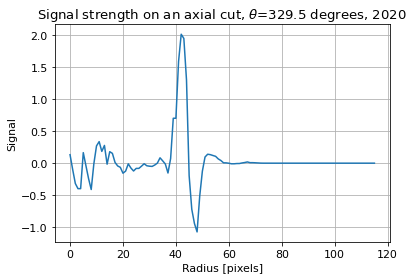

maximum occurs at: (array([42]),)
signal at point 42: 2.0137123406284063
(the format is such that) the planet position in 2020 is: 137.0500538989856 78.17585039268971


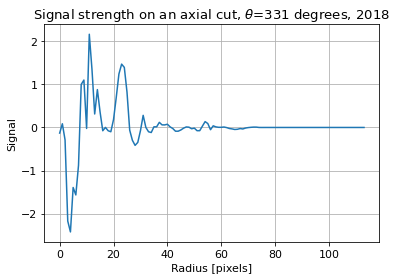

maximum occurs at: (array([11]),)
signal at point 11: 2.1641885794038704
(the format is such that) the planet position in 2020 is: 120.11625326420611 88.84937873433425


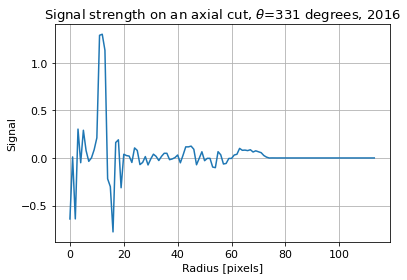

maximum occurs at: (array([12]),)
signal at point 12: 1.3008368440778157
(the format is such that) the planet position in 2020 is: 108.74619707139396 95.15190379753663


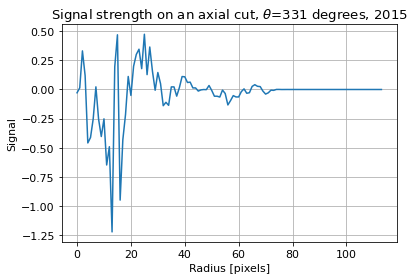

maximum occurs at: (array([25]),)
signal at point 25: 0.47388815304330134
(the format is such that) the planet position in 2020 is: 127.11321092132127 84.97090177236356


In [27]:
# This cell calculates and plots the above, except for radius instead of angle (at an angle of 329.5)

def find_separation__star_planet(angle, signalMatrix, specle_range, rad, year):
    signal, x, y = [], [], []
    points_of_line = range(200)
    radial_step_size = 1
    for i in points_of_line:
        x.append(100 + i*radial_step_size*np.cos(np.deg2rad(angle)))
        y.append(100 + i*radial_step_size*np.sin(np.deg2rad(angle)))
        if round(x[i]) > 199 or round(y[i]) > 199:
            break
        else:
            signal.append(signalMatrix[round(x[i]), round(y[i])])
    points_of_line = points_of_line[0:len(signal)] #print(x), print(y), print(len(points_of_line)), print(len(signal_along_330))
    plt.plot(points_of_line, signal)
    plt.title('Signal strength on an axial cut, $\\theta$='+str(angle)+' degrees, '+str(year))
    plt.xlabel('Radius [pixels]')
    plt.ylabel('Signal')
    plt.grid()
    plt.show()
    # the planet is 329-330 degrees
    planet_signal = signal
    for i in range(specle_range):
        planet_signal[i] = 0
    max_sig_loc = np.where(planet_signal == np.amax(planet_signal))
    print('maximum occurs at:', max_sig_loc)
    print('signal at point '+str(max_sig_loc[0][0])+':', signal[max_sig_loc[0][0]])                       # , signal_at_43[330])
    # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
    
    xPlanet = 100 + rad*radial_step_size*np.cos(np.deg2rad(angle))
    yPlanet = 100 + rad*radial_step_size*np.sin(np.deg2rad(angle))
    print('(the format is such that) the planet position in 2020 is:', xPlanet, yPlanet)
    return(signal, xPlanet, yPlanet)

radius_2020, radius_2018, radius_2016, radius_2015 = 43, 23, 10, 31
signal_2020, xPlanet_2020, yPlanet_2020 = find_separation__star_planet(329.5, signalMatrix_2020, 6, radius_2020, 2020)
signal_2018, xPlanet_2018, yPlanet_2018 = find_separation__star_planet(331, signalMatrix_2018, 6, radius_2018, 2018)
signal_2016, xPlanet_2016, yPlanet_2016 = find_separation__star_planet(331, signalMatrix_2016, 6, radius_2016, 2016)
signal_2015, xPlanet_2015, yPlanet_2015 = find_separation__star_planet(331, signalMatrix_2015, 6, radius_2015, 2015)



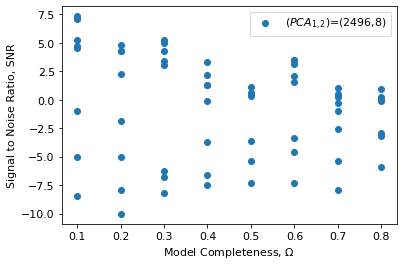

In [28]:
# Plot things #3 (research's goal): sdi residual shape (6 Aug... this might be useless/redundant already)
PC_max = PC_max_ASDI
PCAs_analyzed = 8
PC_used= []
for i in range(PCAs_analyzed):
    for j in range(PCAs_analyzed):
        #print(i+1,j+1)
        PC_used.append([i+1, j+1])
#print(PC_used)
#PC_used = len(SN_table[j][i])    #evaluate(pipeline, 'ADI+SDI', ([1,2,3], [1,2,3]))
                                # ((1,1) (1,2) (1,3))
                                # ((2,1) (2,2) (2,3)) 
                                 # Do I need many observations now? Or just use the sum of the i+j column as te number of pcas used?

model_completeness = np.array(np.divide(PC_used, PC_max))
first_element_of_64_arrays = []
for i in range(len(SN_table_ASDI_18.flatten())):
    #print(i)
    if i % 39 == 0:
        #print(SN_table.flatten()[i])
        first_element_of_64_arrays.append(SN_table_ASDI_18.flatten()[i])
#print(first_element_of_64_arrays)
#print('model_completeness is:', model_completeness)
#print('model_completeness[:,0] is:', model_completeness[:,0])
#print(SN_table_ASDI_18)
plt.plot(model_completeness[:,0], first_element_of_64_arrays, 'o', label='($PCA_{1,2}$)=('+str(i+1)+','+str(j+1)+')') # , color=clrs[3*i+j]
plt.xlabel('Model Completeness, $\Omega$')
plt.ylabel('Signal to Noise Ratio, SNR')
plt.legend()


#This ends the research code above; and begins coding notes below

In [29]:
# Color spectra used for plots
clrs = ['brown', 'maroon', 'red', 'tomato', 'coral', 'darkorange', 'tan', 'orange', 'wheat', 'gold', 'darkkhaki', 'lightyellow', 'olive', 'yellow', 'yellowgreen', 'chartreuse', 'darkseagreen', 'lightgreen', 'forestgreen', 'lime', 'springgreen', 'aquamarine', 'lightseagreen', 'lightcyan', 'teal', 'darkcyan', 'cyan', 'skyblue', 'slategray', 'royalblue', 'navy', 'slateblue', 'blue', 'mediumpurple', 'blueviolet', 'indigo', 'darkviolet', 'thistle', 'plum', 'purple', 'magenta', 'deeppink', 'crimson', 'pink']
greens = ['#88ff6b', '#7bff5b', '#6aff45', '#58ff30', '#45ff18', '#32ff00', '#28cf00', '#21ac00', '#1c8f00', '#167000', '#0f5000', '#092d00', '#031200']

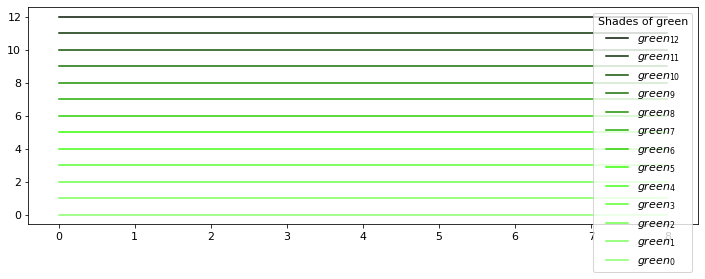

In [30]:
# Plot the gradations of green colors
fig = plt.figure(figsize = (12, 4))
ax = fig.add_subplot(1, 1, 1)
a = np.empty(9)
for i in range(len(greens)):
    for j in range(len(a)):
        a[j] = i
    ax.plot(range(9), a, color=greens[i], label='$green_{'+str(i)+'}$')
handles, labels = ax.get_legend_handles_labels() # This line flips the order of the legend, so it aligns with the plot's colors ###
plt.legend(handles[::-1], labels[::-1], title='Shades of green', loc='upper right') # same as line above

In [31]:
'''        The Code Appendix


# plot HEAT MAPS of average Signal-to-Noise Ratios for the varied PCAs (14 Jun - getting formatting right)


# Sven's imshow code recommendation (for good/simple plots)
fig, axs = plt.subplot((4,4), ....)
axs[0, 0].imshow(....)
axs[0, 0].cbar....
axs[0, 1].imshow(....)





#mat_file = 'test_mat.mat'
# Now load in the data from the .mat that was just saved
#df = scipy.io.loadmat(mat_file)
# And just to check if the data is the same:  
#assert np.all(mat_file == matdata['out'])
#df = pd.read_table(path+file, header=None, delimiter='\t') # the numerical values are all of the "signal_to_noise"s
#df.to_csv(path+'SNR.csv', sep=' ')  
#for j in df:
    #print('j is: ', j)
    #dfNew = [i.split(' ', 999) for i in df]
    #dfNew = [i.split(' ', 999)[0] for i in j]
#print(dfNew)

    If good, turn the line above into an if statement (and the if statement into a function)
if df2[0][0][0] == '(' or df2[0][0][0] == ')':
    PCAs1 = df2[0][0][1]
else:
    PCAs1 = df2[0][0][0]


#plt.figure(figsize = (20, 6))
#ax = fig.add_subplot(3, 1, 1)


for i in range(PCAs1):
    for j in range(PCAs2):
        for k in range(wavelength_index):
            print(k)
            if j < 3:
                SN_table[i, j, k] = df[j][k]
            elif j == 4 or j == 5 or j == 6:
                SN_table[i, j, k] = df[j+1][k]
            elif j == 4 or j == 5 or j == 6:
                SN_table[i, j, k] = df[j+2][k]
            else:
                True
   
built_element = '' # or []? 
            if df[i][j][k] not in bad_character:   #if the character is a number
                if SN_table[i, j, k] == 0:
                    print(k)
                    print(df[i][j][k])
                    built_element = df[i][j][k]     #(unless it's the first character)
                else:
                    built_element.append(df[i][j][k])    #add it
            print('built_element is:', built_element)
            SN_table[i, j, k] = float(built_element)


for i in range(11): # 11 columns in the file
    for k in range(39): # 39 rows in the file
        if i == 0 or i == 1 or i == 2:
            SN_table[i, 0, k] = df[i][k]
        elif i == 4 or i == 5 or i == 6:
            SN_table[i-4, 1, k] = df[i][k]
        elif i == 8 or i == 9 or i == 10:
            SN_table[i-8, 2, k] = df[i][k]
        #else:
            #print('i != 0,1,2, 4,5,6, 8,9,10')
print(SN_table[0][0])




####################################################################
# sns heatmap code (use the imshow unless that's impossible)
uniform_data = np.random.rand(10, 12)
ax = sns.heatmap(uniform_data, linewidth=0.5)
plt.show()
####################################################################
df = pd.DataFrame(np.random.random((4,4)))
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]))
vmin = min(df.values.min(), df2.values.min())
vmax = max(df.values.max(), df2.values.max())
fig, axs = plt.subplots(nrows=2, ncols=3, gridspec_kw=dict(width_ratios=[4,4,0.4]))
sns.heatmap(df, annot=True, cbar=False, ax=axs[0,0], vmin=vmin)
sns.heatmap(df, annot=True, cbar=False, ax=axs[0,1], vmin=vmin)
sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1,0], vmax=vmax)
sns.heatmap(df2, annot=True, yticklabels=False, cbar=False, ax=axs[1,1], vmax=vmax)
#fig.colorbar(axs[1].collections[0], cax=axs[2]) #works with 1x2, but not 2x2
plt.show()
####################################################################



for i in range(11): # 11 columns in the file
    for k in range(39): # 39 rows in the file
        if i == 0 or i == 1 or i == 2:
            SN_table_2018[i, 0, k] = df_2018[i][k]     # print('df_2018[i][k] is:', df_2018[i][k])
            SN_table_2016[i, 0, k] = df_2016[i][k]
            SN_table_2015[i, 0, k] = df_2015[i][k]
        elif i == 4 or i == 5 or i == 6:
            SN_table_2018[i-4, 1, k] = df_2018[i][k]
            SN_table_2016[i-4, 1, k] = df_2016[i][k]
            SN_table_2015[i-4, 1, k] = df_2015[i][k]
        elif i == 8 or i == 9 or i == 10:
            SN_table_2018[i-8, 2, k] = df_2018[i][k]
            SN_table_2016[i-8, 2, k] = df_2016[i][k]
            SN_table_2015[i-8, 2, k] = df_2015[i][k]
        #else:
            #print('i != 0,1,2, 4,5,6, 8,9,10')
#print(SN_table[0][0])


    if year == 2020:
        signalMatrix = signalMatrix
    elif year == 2018:
        signalMatrix = signalMatrix_2018
    elif year == 2016:
        signalMatrix = signalMatrix_2016
    elif year == 2015:
        signalMatrix = signalMatrix_2015
    else:
        print('The year is not recognized... add it or edit it, perhaps')



'''



'''
# Put this in the first cell eventually...
path_2018 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2018-12-15_results/' ###
file_2018 = 'SNR_FormattedByHand.csv'
#file_2018 = 'ff_variable-table_to_file.txt'
file2_2018= 'ff_variable-table_properties.txt'

path_2016 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2016-11-18_results/' ###
file_2016 = 'SNR_FormattedByHand.csv'
#file_2016 = 'ff_variable-table_to_file.txt'
file2_2016= 'ff_variable-table_properties.txt'

path_2015 = '/home/dcpetit/Documents/kuleuven_astronomy/Thesis_masters/beta_pic_results_made6Apr2022/2015-11-30_results/' ###
file_2015 = 'SNR_FormattedByHand.csv'
#file_2015 = 'ff_variable-table_to_file.txt'
file2_2015= 'ff_variable-table_properties.txt'

df_2018 = pd.read_csv(path_2018+file, header=None) #change file name?
df_2016 = pd.read_csv(path_2016+file, header=None)
df_2015 = pd.read_csv(path_2015+file, header=None)

df2_2018= pd.read_table(path_2018+file2, header=None, delimiter=',')
df2_2016= pd.read_table(path_2016+file2, header=None, delimiter=',')
df2_2015= pd.read_table(path_2015+file2, header=None, delimiter=',')

PCAs1_2018 = int(df2_2018[0][0][1])
PCAs1_2016 = int(df2_2016[0][0][1])
PCAs1_2015 = int(df2_2015[0][0][1])

PCAs2_2018 = int(df2_2018[1][0])
PCAs2_2016 = int(df2_2016[1][0])
PCAs2_2015 = int(df2_2015[1][0])

wavelength_index_2018 = int(df2_2018[2][0])
wavelength_index_2016 = int(df2_2016[2][0])
wavelength_index_2015 = int(df2_2015[2][0])

SN_table_2018 = np.zeros( ( PCAs1_2018, PCAs2_2018, wavelength_index_2018 ), dtype=float, order='C')
SN_table_2016 = np.zeros( ( PCAs1_2016, PCAs2_2016, wavelength_index_2016 ), dtype=float, order='C')
SN_table_2015 = np.zeros( ( PCAs1_2015, PCAs2_2015, wavelength_index_2015 ), dtype=float, order='C')

for i in range(11): # 11 columns in the file
    for k in range(39): # 39 rows in the file
        if i == 0 or i == 1 or i == 2:
            SN_table_2018[i, 0, k] = df_2018[i][k]
            ...
        #else:
            #print('i != 0,1,2, 4,5,6, 8,9,10')
'''


'''yr_2020_path = '2020-02-08_results/ff_variable-table_to_file_'
yr_2018_path = '2018-12-15_results/ff_variable-table_to_file_'
yr_2016_path = '2016-11-18_results/ff_variable-table_to_file_'
yr_2015_path = '2015-11-30_results/ff_variable-table_to_file_' 


#file = 'SNR_FormattedByHand.csv'
#fileGood = 'ff_variable-table_to_file.txt'
#df = pd.read_csv(path+file, header=None)#, sep=',') # Now obsolete...?
#df = np.load(path+'ff_variable-table_to_file.npy')

'''


'''for i in range(8):
    for j in range(8):
        for k in range(39):
            SN_table_ASDI_18[i, j, k] = df_ASDI_18_2020[i][j][k]
            SN_table_SADI_18[i, j, k] = df_SADI_18_2020[i][j][k]'''


''' For CODI data reduction: 
print(df_ASDI_1_3)
print(df_CODI)
for i in range(3): 
    for k in range(39): # 39 rows in the file/data
        SN_table_c[i, k] = df_CODI[i][k]
        #model_completeness[i, j, :] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for CODI
        model_completeness[i, j] = [(i+1)/(N_tot_lambda - 1), (j+1)/(39-1)] # for CODI
        # CHANGE THIS MODEL COMPLETENESS           
'''


'''
SN_table_a = np.zeros( ( PCAs1, PCAs2, wavelength_index ), dtype=float, order='C') #print(SN_table)
SN_table_b = np.zeros( ( PCAs1_b, PCAs2_b, wavelength_index_b ), dtype=float, order='C') #print(SN_table)
SN_table_c = np.zeros( ( PCAs1_c, wavelength_index_c ), dtype=float, order='C') #print(SN_table)
SN_table_ASDI_16 = np.zeros( ( PCAs1_ASDI_1_6, PCAs2_ASDI_1_6, wavelength_index_ASDI_1_6 ), dtype=float, order='C') #print(SN_table)
SN_table_SADI_16 = np.zeros( ( PCAs1_SADI_1_6, PCAs2_SADI_1_6, wavelength_index_SADI_1_6 ), dtype=float, order='C') #print(SN_table)
SN_table_ASDI_18 = np.zeros( ( PCAs1_ASDI_1_8, PCAs2_ASDI_1_8, wavelength_index_ASDI_1_8 ), dtype=float, order='C') #print(SN_table)
SN_table_SADI_18 = np.zeros( ( PCAs1_SADI_1_8, PCAs2_SADI_1_8, wavelength_index_SADI_1_8 ), dtype=float, order='C') #print(SN_table)
'''


'''signalMatrix_2020 = np.zeros(200*200).reshape(200,200)
signalMatrix_2018 = np.zeros(200*200).reshape(200,200)
signalMatrix_2016 = np.zeros(200*200).reshape(200,200)
signalMatrix_2015 = np.zeros(200*200).reshape(200,200)
#print(signalMatrix)
for i in range(len(x_2020)): # i --> j
    for j in range(len(y_2020)): # j --> k
        #print('i and j are:\n', i, j)
        signalMatrix_2020[i][j] = image_data_2020[0][0][32][i][j] # This is ADI... so 1 PCA column...
        #signalMatrix_2020[i][j] = image_data_2020[0][32][i][j] # This is ADI... so 1 PCA column...
        signalMatrix_2018[i][j] = image_data_2018[0][0][32][i][j] # This is ASDI or so, so 2!
        signalMatrix_2016[i][j] = image_data_2016[0][0][32][i][j]
        signalMatrix_2015[i][j] = image_data_2015[0][0][32][i][j]'''


'''
max_signal_strength = find_maximum_signal(SN_table_a, 3, 3)
a = pd.DataFrame(max_signal_strength)       # a = np.random.random((8, 8))
max_signal_strength_b = find_maximum_signal(SN_table_b, 3, 3)
b = pd.DataFrame(max_signal_strength_b)
max_signal_strength_ASDI_1_6 = find_maximum_signal(SN_table_ASDI_16, 6, 6)
ASDI_16 = pd.DataFrame(max_signal_strength_ASDI_1_6) #ASDI 1-6
max_signal_strength_SADI_1_6 = find_maximum_signal(SN_table_SADI_16, 6, 6)
SADI_16 = pd.DataFrame(max_signal_strength_SADI_1_6) #SADI 1-6

max_signal_strength_ASDI_1_8 = find_maximum_signal(SN_table_ASDI_18, 8, 8)
ASDI_18 = pd.DataFrame(max_signal_strength_ASDI_1_8) #ASDI 1-6
max_signal_strength_SADI_1_8 = find_maximum_signal(SN_table_SADI_18, 8, 8)
SADI_18 = pd.DataFrame(max_signal_strength_SADI_1_8) #SADI 1-6
'''


'''
WLI_of_interest = 22 - 1 # leave the -1 for python's indexing
plt.figure(figsize=(10,6))
for i in wavelength_index:
    rad_2020, sig_2020 = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020)
    if i != WLI_of_interest:
        plt.plot(rad_2020, sig_2020, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
    else:
        plt.plot(rad_2020, sig_2020, linewidth=4, color=p(i/(n-1)), label=str(i+1))
plt.title('Signal to noise on a line through the planet for different WLDs')
plt.xlim(26, 65)
plt.ylim(-3, 5)
plt.xlabel('Distance from star [pixels]')
plt.ylabel('Signal strength')
plt.legend(ncol=2, loc=1)
plt.show()
'''


'''
plt.figure(figsize=(6,4)); min = 14; max = 31
wl_selection = wavelength_index[min:max]
for i in wl_selection:
    rad_2020, sig_2020 = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020)
    if i != WLI_of_interest:
        plt.plot(rad_2020, sig_2020, linewidth=1, color=p((i-min)/(len(wl_selection)-1)), label=str(i+1))
    else:
        plt.plot(rad_2020, sig_2020, linewidth=3, color=p((i-min)/(len(wl_selection)-1)), label=str(i+1))
plt.title('Zoom in on peak (colors adapted)')
plt.xlim(40, 49)
plt.ylim(1.2, 3.3)
plt.xlabel('Distance from star [pixels]')
plt.ylabel('Signal strength')
plt.legend(ncol=2)
plt.show()
'''


'''plt.figure(figsize=(18,10))
for i in wavelength_index:
    rad_2018, sig_2018 = plot_signal_profile(i, UniqueBoxesNP_2018, image_data_2018) # Peak should be at ~23 pixels distance?
    plt.plot(rad_2018, sig_2018, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('ZOOMED Signal to noise on a line through the star and planet for different WLDs (2018)'), 
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)'), plt.ylabel('Signal strength'), plt.legend(ncol=3)
plt.xlim(15,30)
plt.ylim(-4,2.5)
plt.show()
'''
#wavelength_index = np.array(range(39))
#n = np.max(wavelength_index)
#p = plt.get_cmap('inferno') 


'''
signal_at_43_2020, x_2020, y_2020 = [], [], []
degrees = range(360)
radius_2020 = 43
for i in degrees:
    x_2020.append(100 + radius_2020*np.cos(np.deg2rad(i)))
    y_2020.append(100 + radius_2020*np.sin(np.deg2rad(i)))
    signal_at_43_2020.append(signalMatrix_2020[round(x_2020[i]), round(y_2020[i])]) ###
# print(x), print(y)
plt.plot(degrees, signal_at_43_2020)
plt.title('Signal strength on a circle, r=43 pixes, around star (2020)')
plt.xlabel('$\\theta$, Angle [degrees]')
plt.ylabel('Signal')
plt.grid()
plt.show()
# the planet is 329-330 degrees 
print('maximum occurs at:', np.where(signal_at_43_2020 == np.amax(signal_at_43_2020)))
print('329 and 330 are:', signal_at_43_2020[329], signal_at_43_2020[330])
# Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet = 100 + 43*np.cos(np.deg2rad(329.5))
yPlanet = 100 + 43*np.sin(np.deg2rad(329.5))
print('the format is such that the planet position is:', xPlanet, yPlanet) #This is what's inputted 

# Do above for 2018 observation, r ~ 23.26
signal_at_23_2018, x_2018, y_2018 = [], [], []
radius = 23.26
for i in degrees:
    x_2018.append(100 + radius*np.cos(np.deg2rad(i)))
    y_2018.append(100 + radius*np.sin(np.deg2rad(i))) #print(signal_at_23_2018) #print(i)
    signal_at_23_2018.append(signalMatrix_2018[round(x_2018[i]), round(y_2018[i])]) ###
plt.plot(degrees, signal_at_23_2018)
plt.title('Signal strength on a circle, r=23 pixes, around star (2018)'), plt.xlabel('$\\theta$, Angle [degrees]')
plt.ylabel('Signal'), plt.grid(), plt.show()
# the planet is at 331 degrees 
print('maximum occurs at:', np.where(signal_at_23_2018 == np.amax(signal_at_23_2018)))
print('331 is:', signal_at_23_2018[331]) # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet_2018 = 100 + radius*np.cos(np.deg2rad(331))
yPlanet_2018 = 100 + radius*np.sin(np.deg2rad(331))
print('the format is such that the planet position in 2018 is:', xPlanet_2018, yPlanet_2018)

# Do above for 2016 observation, r ~10
signal_at_10_2016, x_2016, y_2016 = [], [], []
radius = 10
for i in degrees:
    x_2016.append(100 + radius*np.cos(np.deg2rad(i)))
    y_2016.append(100 + radius*np.sin(np.deg2rad(i))) #print(signal_at_23_2018) #print(i)
    signal_at_10_2016.append(signalMatrix_2016[round(x_2016[i]), round(y_2016[i])]) ###
plt.plot(degrees, signal_at_10_2016)
plt.title('Signal strength on a circle, r=10 pixes, around star (2016)'), plt.xlabel('$\\theta$, Angle [degrees]')
plt.ylabel('Signal'), plt.grid(), plt.show()
# the planet is _______ degrees 
print('maximum occurs at:', np.where(signal_at_10_2016 == np.amax(signal_at_10_2016)))
print('250 is:', signal_at_10_2016[250]) # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet_2016 = 100 + radius*np.cos(np.deg2rad(331))
yPlanet_2016 = 100 + radius*np.sin(np.deg2rad(331))
print('the format is such that the planet position in 2016 is:', xPlanet_2016, yPlanet_2016)

# Do above for 2015 observation, r ~ 23.26
signal_at_31_2015, x_2015, y_2015 = [], [], []
radius = 30.805843601
for i in degrees:
    x_2015.append(100 + radius*np.cos(np.deg2rad(i)))
    y_2015.append(100 + radius*np.sin(np.deg2rad(i)))
    signal_at_31_2015.append(signalMatrix_2015[round(x_2015[i]), round(y_2015[i])]) ###
plt.plot(degrees, signal_at_31_2015)
plt.title('Signal strength on a circle, r=31 pixes, around star (2015)'), plt.xlabel('$\\theta$, Angle [degrees]')
plt.ylabel('Signal'), plt.grid(), plt.show()
# the planet is 146 degrees 
print('maximum occurs at:', np.where(signal_at_31_2015 == np.amax(signal_at_31_2015)))
print('146 and 147 are:', signal_at_31_2015[146], signal_at_31_2015[147]) # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet_2015 = 100 + radius*np.cos(np.deg2rad(146.5))
yPlanet_2015 = 100 + radius*np.sin(np.deg2rad(146.5))
print('the format is such that the planet position in 2015 is:', xPlanet_2015, yPlanet_2015)
'''




'''
signal_along_330_2020, x_2020, y_2020 = [], [], []
points_of_line = range(200)
radial_step_size = 1
for i in points_of_line:
    x_2020.append(100 + i*radial_step_size*np.cos(np.deg2rad(329.5)))
    y_2020.append(100 + i*radial_step_size*np.sin(np.deg2rad(329.5)))
    if round(x_2020[i]) > 199 or round(y_2020[i]) > 199:
        break
    else:
        signal_along_330_2020.append(signalMatrix_2020[round(x_2020[i]), round(y_2020[i])])
points_of_line = points_of_line[0:len(signal_along_330_2020)]
#print(x), print(y), print(len(points_of_line)), print(len(signal_along_330))
plt.plot(points_of_line, signal_along_330_2020)
plt.title('Signal strength on an axial cut, $\\theta$=330 degrees, 2020')
plt.xlabel('Radius [pixels]')
plt.ylabel('Signal')
plt.grid()
plt.show()

# the planet is 329-330 degrees
planet_signal_along_330_2020 = signal_along_330_2020
for i in range(6):
    planet_signal_along_330_2020[i] = 0
print('maximum occurs at:', np.where(planet_signal_along_330_2020 == np.amax(planet_signal_along_330_2020)))
print('signal at point 43:', signal_along_330_2020[43])# , signal_at_43[330])
# Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
radius_2020 = 43
xPlanet = 100 + radius_2020*radial_step_size*np.cos(np.deg2rad(329.5))
yPlanet = 100 + radius_2020*radial_step_size*np.sin(np.deg2rad(329.5))
print('(the format is such that) the planet position in 2020 is:', xPlanet, yPlanet)


signal_along_331_2018, x_2018, y_2018 = [], [], []
points_of_line_2018 = range(200)
radial_step_size = 1
for i in points_of_line_2018:
    x_2018.append(100 + i*radial_step_size*np.cos(np.deg2rad(331)))
    y_2018.append(100 + i*radial_step_size*np.sin(np.deg2rad(331)))
    if round(x_2018[i]) > 199 or round(y_2018[i]) > 199:
        break
    else:
        signal_along_331_2018.append(signalMatrix_2018[round(x_2018[i]), round(y_2018[i])])
points_of_line_2018 = points_of_line_2018[0:len(signal_along_331_2018)]     #print(x), print(y), print(len(points_of_line)), print(len(signal_along_330))
plt.plot(points_of_line_2018, signal_along_331_2018)
plt.title('Signal strength on an axial cut, $\\theta$=331 degrees, 2018')
plt.xlabel('Radius [pixels]'), plt.ylabel('Signal'), plt.grid(), plt.show()
# the planet is 329-330 degrees
planet_signal_along_330_2018 = signal_along_331_2018
for i in range(12):
    planet_signal_along_330_2018[i] = 0
print('maximum occurs at:', np.where(planet_signal_along_330_2018 == np.amax(planet_signal_along_330_2018)))
print('signal at point 23:', signal_along_331_2018[23])# , signal_at_43[330]) # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet = 100 + 43*radial_step_size*np.cos(np.deg2rad(331))
yPlanet = 100 + 43*radial_step_size*np.sin(np.deg2rad(331))
print('(the format is such that) the planet position in 2018 is:', xPlanet_2018, yPlanet_2018)

signal_along_331_2016, x_2016, y_2016 = [], [], []
points_of_line_2016 = range(200)
radial_step_size = 1
for i in points_of_line_2016:
    x_2016.append(100 + i*radial_step_size*np.cos(np.deg2rad(331)))
    y_2016.append(100 + i*radial_step_size*np.sin(np.deg2rad(331)))
    if round(x_2016[i]) > 199 or round(y_2016[i]) > 199:
        break
    else:
        signal_along_331_2016.append(signalMatrix_2016[round(x_2016[i]), round(y_2016[i])])
points_of_line_2016 = points_of_line_2016[0:len(signal_along_331_2016)]     #print(x), print(y), print(len(points_of_line)), print(len(signal_along_330))
plt.plot(points_of_line_2016, signal_along_331_2016)
plt.title('Signal strength on an axial cut, $\\theta$=331 degrees, 2016')
plt.xlabel('Radius [pixels]'), plt.ylabel('Signal'), plt.grid(), plt.show()
# the planet is 329-330 degrees
planet_signal_along_331_2016 = signal_along_331_2016
for i in range(6):
    planet_signal_along_331_2016[i] = 0
print('maximum occurs at:', np.where(signal_along_331_2016 == np.amax(planet_signal_along_331_2016)))
print('signal at point 23:', signal_along_331_2016[23])# , signal_at_43[330]) # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet_2016 = 100 + 23*radial_step_size*np.cos(np.deg2rad(331))
yPlanet_2016 = 100 + 23*radial_step_size*np.sin(np.deg2rad(331))
print('(the format is such that) the planet position in 2016 is:', xPlanet_2016, yPlanet_2016)

# Now for 2015... 
signal_along_146_2015, x_2015, y_2015 = [], [], []
points_of_line_2015 = range(200)
radial_step_size = 1
for i in points_of_line_2015:
    x_2015.append(100 + i*radial_step_size*np.cos(np.deg2rad(146.5)))
    y_2015.append(100 + i*radial_step_size*np.sin(np.deg2rad(146.5)))
    if round(x_2015[i]) > 199 or round(y_2015[i]) > 199:
        break
    else:
        signal_along_146_2015.append(signalMatrix_2015[round(x_2015[i]), round(y_2015[i])])
points_of_line_2015 = points_of_line_2015[0:len(signal_along_146_2015)]     #print(x), print(y), print(len(points_of_line)), print(len(signal_along_330))
plt.plot(points_of_line_2015, signal_along_146_2015)
plt.title('Signal strength on an axial cut, $\\theta$=331 degrees, 2015')
plt.xlabel('Radius [pixels]'), plt.ylabel('Signal'), plt.grid(), plt.show()
# the planet is _______ degrees
planet_signal_along_146_2015 = signal_along_146_2015
for i in range(6):
    planet_signal_along_146_2015[i] = 0
print('maximum occurs at:', np.where(signal_along_146_2015 == np.amax(planet_signal_along_146_2015)))
print('signal at point 15:', signal_along_146_2015[15])# , signal_at_43[330]) # Currently, there are repeated pixels in the circle of signal.. can remove extras, if important 
xPlanet = 100 + 15*radial_step_size*np.cos(np.deg2rad(331))
yPlanet = 100 + 15*radial_step_size*np.sin(np.deg2rad(331))
print('(the format is such that) the planet position in 2015 is:', xPlanet_2015, yPlanet_2015)

'''


'''
plt.figure(figsize=(18,10))
for i in wavelength_index:
    rad_2020, sig_2020 = plot_signal_profile(i, UniqueBoxesNP_2020, image_data_2020)
    plt.plot(rad_2020, sig_2020, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Signal to noise on a line through the star and planet for different WLDs (2020)')
plt.xlim(-70, 70)
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)')
plt.ylabel('Signal strength')
plt.legend(ncol=3)
plt.show()
plt.figure(figsize=(18,10))
for i in wavelength_index:
    rad_2018, sig_2018 = plot_signal_profile(i, UniqueBoxesNP_2018, image_data_2018) # Peak should be at ~23 pixels distance?
    plt.plot(rad_2018, sig_2018, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Signal to noise on a line through the star and planet for different WLDs (2018)'), plt.xlim(-70, 70), 
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)'), plt.ylabel('Signal strength'), plt.legend(ncol=3)
plt.show()
plt.figure(figsize=(18,10))
for i in wavelength_index:
    rad_2016, sig_2016 = plot_signal_profile(i, UniqueBoxesNP_2016, image_data_2016)
    plt.plot(rad_2016, sig_2016, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Signal to noise on a line through the star and planet for different WLDs (2016)'), plt.xlim(-70, 70), 
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)'), plt.ylabel('Signal strength'), plt.legend(ncol=3)
plt.show()
plt.figure(figsize=(18,10))
for i in wavelength_index:
    rad_2015, sig_2015 = plot_signal_profile(i, UniqueBoxesNP_2015, image_data_2015)
    plt.plot(rad_2015, sig_2015, linewidth=0.4, color=p(i/(n-1)), label=str(i+1))
plt.title('Signal to noise on a line through the star and planet for different WLDs (2015)'), plt.xlim(-70, 70), 
plt.xlabel('Distance from star [pixels] (+/- 0 is arbitrary)'), plt.ylabel('Signal strength'), plt.legend(ncol=3)
plt.show()
'''



'''plt.figure(figsize=(10,4))
plt.plot(DistanceFromStarTruncate_2020, CrossSectionalSignal_2020)
plt.title('Signal on (line) profile of stars & planet (2020 obs)')
plt.xlabel('Distance/radius')
plt.ylabel('Signal strength')
plt.ylim(-5,8)
plt.show()
plt.figure(figsize=(10,4))
plt.plot(DistanceFromStarTruncate_2018, CrossSectionalSignal_2018)
plt.title('Signal on (line) profile of stars & planet (2018 obs)')
plt.xlabel('Distance/radius')
plt.ylabel('Signal strength')
plt.ylim(-5,8)
plt.show()
plt.plot(DistanceFromStarTruncate_2016, CrossSectionalSignal_2016)
plt.title('Signal on (line) profile of stars & planet (2016 obs)')
plt.xlabel('Distance/radius')
plt.ylabel('Signal strength')
plt.ylim(-5,8)
plt.show()
plt.plot(DistanceFromStarTruncate_2015, CrossSectionalSignal_2015)
plt.title('Signal on (line) profile of stars & planet (2015 obs)')
plt.xlabel('Distance/radius')
plt.ylabel('Signal strength')
plt.ylim(-5,8)
plt.show()
plt.figure(figsize=(10,4))
plt.plot(testDFST, testCSS)
plt.title('Signal on another (test line) profile through the star')
plt.ylabel('Signal strength')
plt.ylim(-5,8)
plt.show()'''

'''max_location = np.zeros(len(wavelength_index))
print('max_location is', max_location) # should be 39 zeros
# loop thru each WLD's radius range, and find the maximum value for each WLD, then let it be 1 of 39 peak centers
for i in wavelength_index:
    for j in range(points_in_range_counter):
        if i >= starting_point_counter:
            if signal_2020_modified[i,j] > max_location[i]:
                max_location[i] = signal_2020_modified[i,j]
    print('np.where(signal_2020_modified[i] == max_location[i]), should be ~40, and is:', np.where(signal_2020_modified[i] == max_location[i]))
    peak_center.append(np.where(signal_2020_modified[i] == max_location[i])) # assign the maximum of this WLD (at planet)
peak_center.pop(0)
print('len(peak_center) should be, 39, and is', len(peak_center))
print('peak_center.shape, should be 39x1, and is', np.array(peak_center).shape)
print('peak_center is', peak_center) # should be (43, 43, 33, 33, ... 43, 43, 41, 41)

for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > r_min and radius[j] < r_max:
            points_in_range_counter = points_in_range_counter + 1 # loop thru signal array, find how first and many points near peak
            if starting_point_counter == 0:
                starting_point_counter.append(i)

duration = 1                                                     
theta = np.linspace(0, 2*np.pi, points_in_range_counter)                    
print('points_in_range_counter is:', points_in_range_counter)
print('range(len(signal_2020_modified[0])) is', range(len(signal_2020_modified[0])))
for i in wavelength_index:
    for j in range(len(signal_2020_modified[i])):
        if radius[j] > r_min and radius[j] < r_max:
            signal_2020_modified[i, j] = signal_2020_modified[i, j]*((1/2)*(np.cos(duration*theta[j-starting_point_counter]) + 1)) # loop thru signals, if in peak, multiply
print('signal_2020_modified is:', signal_2020_modified)'''



'''for i in range(len(wavelength_index)):
    # IN PIXEL DISTANCE (-114 to 114)!!!
    for j in range(len(radius)):
        if i == 2:
                                                        #print('radius[j] should be -100 to 100, and is:', radius[j])
        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:
                                    #print('i', i)
                                    #print('j', j)
                                    #print('signal_2020_modified[i,j]', signal_2020_modified[i,j])
                                    #signal_2020_modified[i,j] = signal_2020_modified[i,j]*((1/2)*(np.cos(duration*theta[j-starting_point_counter[i]]) + 1)) # loop thru signals, if in peak, multiply
'''



#from scipy import ndimage
#rotated_img = signalMatrix_2020
#rotated_img = ndimage.rotate(rotated_img, 1) #172.4
#rotated_img = np.fliplr(rotated_img)
#from PIL import Image
#im = Image.open('data/src/lena.jpg')
#im_rotate = signalMatrix_2020.rotate(90)





"for i in range(len(wavelength_index)):\n    # IN PIXEL DISTANCE (-114 to 114)!!!\n    for j in range(len(radius)):\n        if i == 2:\n                                                        #print('radius[j] should be -100 to 100, and is:', radius[j])\n        if radius[j] > ranges[i,0] and radius[j] < ranges[i,1]:\n                                    #print('i', i)\n                                    #print('j', j)\n                                    #print('signal_2020_modified[i,j]', signal_2020_modified[i,j])\n                                    #signal_2020_modified[i,j] = signal_2020_modified[i,j]*((1/2)*(np.cos(duration*theta[j-starting_point_counter[i]]) + 1)) # loop thru signals, if in peak, multiply\n"